# Colour Factors in QCD - Testing & Visualization Notebook

This notebook demonstrates and tests the quantum circuits for computing colour factors in QCD amplitudes.

**Reference:** H. A. Chawdhry and M. Pellen, "Quantum simulation of colour in perturbative quantum chromodynamics", SciPost Phys. 15, 205 (2023). [arXiv:2303.04818](https://arxiv.org/abs/2303.04818)

## Contents
1. [Setup & Imports](#setup)
2. [SU(3) Data Verification](#su3)
3. [Gate Visualizations](#gates)
4. [Circuit Visualizations](#circuits)
5. [Colour Factor Computation](#colour-factors)
6. [Unit Tests](#tests)

## Physical Background: Quantum Chromodynamics and Colour

**Quantum Chromodynamics (QCD)** is the non-Abelian gauge theory describing the strong interaction between quarks and gluons. Unlike Quantum Electrodynamics (QED), where the photon carries no electric charge, in QCD the gauge bosons — **gluons** — themselves carry colour charge. This self-interaction is responsible for phenomena like confinement and asymptotic freedom.

### The SU(3) Colour Gauge Group

The gauge symmetry of QCD is the special unitary group **SU(3)**, acting on a 3-dimensional internal "colour" space. The key representations are:

| Particle | Representation | Dimension | Qubits needed |
|----------|---------------|-----------|---------------|
| Quark | Fundamental (**3**) | 3 | 2 (states $\vert 00\rangle, \vert 01\rangle, \vert 10\rangle$) |
| Antiquark | Antifundamental ($\bar{\mathbf{3}}$) | 3 | 2 |
| Gluon | Adjoint (**8**) | $N_c^2 - 1 = 8$ | 3 (states $\vert 000\rangle$ to $\vert 111\rangle$) |

Physically, quarks carry one of three "colours" (red, green, blue), while gluons carry a colour–anticolour combination. Observable hadrons are **colour singlets** — superpositions that transform trivially under SU(3).

### Lie Algebra and Generators

The Lie algebra $\mathfrak{su}(3)$ consists of $3 \times 3$ traceless Hermitian matrices. It has dimension $N_c^2 - 1 = 8$, spanned by the **Gell-Mann matrices** $\lambda^1, \ldots, \lambda^8$.

The **generators** in the fundamental representation are defined as:
$$
T^a = \frac{\lambda^a}{2}, \qquad a = 1, \ldots, 8.
$$

These satisfy the **commutation relations**:
$$
[T^a, T^b] = i f^{abc} T^c,
$$
where $f^{abc}$ are the **structure constants** of SU(3), which are totally antisymmetric.

### Normalisation Conventions

We adopt the standard normalisation:
$$
\operatorname{Tr}(T^a T^b) = \frac{1}{2} \delta^{ab},
$$
which implies for the Gell-Mann matrices:
$$
\operatorname{Tr}(\lambda^a \lambda^b) = 2\, \delta^{ab}.
$$

This is crucial for computing colour factors correctly.

## The Gell-Mann Matrices

The eight Gell-Mann matrices provide an explicit basis for $\mathfrak{su}(3)$:

$$
\lambda^1 = \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix}, \quad
\lambda^2 = \begin{pmatrix} 0 & -i & 0 \\ i & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix}, \quad
\lambda^3 = \begin{pmatrix} 1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & 0 \end{pmatrix},
$$

$$
\lambda^4 = \begin{pmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ 1 & 0 & 0 \end{pmatrix}, \quad
\lambda^5 = \begin{pmatrix} 0 & 0 & -i \\ 0 & 0 & 0 \\ i & 0 & 0 \end{pmatrix}, \quad
\lambda^6 = \begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix},
$$

$$
\lambda^7 = \begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & -i \\ 0 & i & 0 \end{pmatrix}, \quad
\lambda^8 = \frac{1}{\sqrt{3}} \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -2 \end{pmatrix}.
$$

**Properties:**
- Each $\lambda^a$ is **Hermitian**: $(\lambda^a)^\dagger = \lambda^a$
- Each $\lambda^a$ is **traceless**: $\operatorname{Tr}(\lambda^a) = 0$
- **Orthonormality**: $\operatorname{Tr}(\lambda^a \lambda^b) = 2\delta^{ab}$

The matrices $\lambda^{1,2,3}$ generate an SU(2) subgroup (isospin), $\lambda^{4,5}$ and $\lambda^{6,7}$ connect different quark flavours, and $\lambda^8$ is the diagonal hypercharge generator.

## Colour Factors in Feynman Diagrams

In any QCD Feynman diagram, each **quark–gluon vertex** contributes a factor of the generator $T^a_{ij}$, where:
- $a$ is the gluon colour index ($a = 1, \ldots, 8$)
- $i, j$ are quark colour indices ($i, j = 1, 2, 3$)

The **colour factor** $C$ is the result of:
1. Writing down the product of all $T^a$ matrices at vertices
2. Contracting all internal colour indices (summing over repeated indices)
3. Taking traces over closed quark loops

### Example: Quark Self-Energy (Figure 1)

For a quark emitting and reabsorbing a gluon:

```
    q_i ───●───────●─── q_k
           ╲     ╱
            ╲   ╱
             ╲ ╱   gluon (colour a)
```

The colour structure is:
$$
C = \sum_{a=1}^{8} \sum_{i,j,k=1}^{3} (T^a)_{ij} (T^a)_{jk} \delta_{ik} = \sum_{a=1}^{8} \operatorname{Tr}\bigl[(T^a)^2\bigr].
$$

Using the trace normalisation $\operatorname{Tr}(T^a T^b) = \frac{1}{2}\delta^{ab}$:
$$
C = \sum_{a=1}^{8} \frac{1}{2} = \frac{8}{2} = 4.
$$

### Casimir Invariants

The **quadratic Casimir** of the fundamental representation is:
$$
C_F = \sum_a (T^a)^2 = \frac{N_c^2 - 1}{2N_c} = \frac{4}{3} \quad \text{(for } N_c = 3\text{)}.
$$

The colour factor $C = 4$ above equals $C_F \cdot N_c = \frac{4}{3} \times 3 = 4$.

The **quadratic Casimir** of the adjoint representation (for gluon loops) is:
$$
C_A = N_c = 3.
$$

## Quantum Circuit Approach: The Unitarisation Problem

The key challenge in implementing colour factors on a quantum computer is that the generators $T^a$ are **Hermitian but not unitary**. Quantum gates must be unitary, so we need a clever workaround.

### The Chawdhry–Pellen Unitarisation Scheme

The paper introduces **unitary-adjusted matrices** $\hat{\lambda}^a$ that:
1. Are **unitary**: $(\hat{\lambda}^a)^\dagger \hat{\lambda}^a = \mathbb{1}$
2. Agree with $\lambda^a$ on "most" matrix elements

The key insight is encoded in **Equation (33)** of the paper:
$$
\mu(a, i) \, \hat{\lambda}^a \, |i\rangle = \frac{1}{2} \lambda^a \, |i\rangle = T^a \, |i\rangle,
$$

where $\mu(a, i)$ is a **correction coefficient** that captures the deviation between $\hat{\lambda}^a$ and $\lambda^a / 2$.

### The Coefficient $\mu(a, i)$

For each gluon colour $a$ and quark colour $i$, the coefficient $\mu(a, i)$ is defined such that:
- If row $i$ of $\hat{\lambda}^a$ matches row $i$ of $\lambda^a / 2$: then $\mu(a, i) = 1$
- Otherwise: $\mu(a, i)$ is chosen to make Eq. (33) hold

Crucially, $|\mu(a, i)| \leq 1$ for all valid $(a, i)$ pairs, which allows encoding in quantum amplitudes.

### The Unitarisation Register

To handle the non-unitary $\mu$ coefficients, the algorithm introduces an **ancilla register** $U$ (the "unitarisation register"). The amplitude in state $|0\rangle_U$ after the circuit encodes the product of all $\mu$ coefficients along the diagram:
$$
\text{amplitude in } |0\rangle_U \propto \prod_{\text{vertices}} \mu(a_v, i_v).
$$

This is the key trick: non-unitarity is "hidden" in the amplitude of a specific ancilla state.

## The Quantum Gates

### A Gate: The Increment Operator (Eq. 25)

The **A gate** performs a cyclic increment on the unitarisation register:
$$
A \, |k\rangle_U = |k + 1 \mod 2^{N_U}\rangle_U.
$$

This is implemented as a ripple-carry incrementer using a cascade of controlled-X gates.

### B Gate: Amplitude Transfer (Eq. 26)

The **B gate** transfers a coefficient $\alpha$ into the amplitude of the ancilla. For a single qubit, the core operation is:
$$
B_1(\alpha) = \begin{pmatrix} \sqrt{1 - |\alpha|^2} & \alpha \\ -\alpha^* & \sqrt{1 - |\alpha|^2} \end{pmatrix}.
$$

This is a unitary rotation that maps:
$$
B_1(\alpha) \, |0\rangle = \sqrt{1 - |\alpha|^2} \, |0\rangle + \alpha \, |1\rangle.
$$

For the full unitarisation register, $B(\alpha)$ applies $B_1(\alpha)$ to the first qubit, controlled on all other qubits being in $|0\rangle$.

### M Gate: The Correction Operator (Eq. 31)

The **M gate** applies controlled-$B(\mu(a, i))$ operations for each gluon colour $a$ and quark colour $i$:
$$
M = \prod_{a=1}^{8} \prod_{i=1}^{3} \bigl[ B(\mu(a, i)) \bigr]^{|a-1\rangle_g |i-1\rangle_q}.
$$

Here the superscript denotes control: the $B$ gate is applied only when the gluon register is in state $|a-1\rangle$ and the quark register is in state $|i-1\rangle$ (using the 2-qubit encoding for colours 1, 2, 3).

### Λ Gate: Controlled Colour Rotation (Eq. 29)

The **Λ (Lambda) gate** applies the unitary-adjusted matrix $\hat{\lambda}^a$ to the quark register, controlled by the gluon colour:
$$
\Lambda = \sum_{a=1}^{8} |a-1\rangle\langle a-1|_g \otimes \hat{\lambda}^a_q.
$$

In circuit form, this is 8 controlled unitaries, each conditioned on a different gluon basis state.

## The Q Gate: Complete Quark–Gluon Vertex (Eq. 30)

The **Q gate** implements a single quark–gluon interaction vertex. It combines all the components:
$$
Q = \bigl( \Lambda \otimes \mathbb{1}_U \bigr) \cdot M \cdot \bigl( \mathbb{1}_g \otimes \mathbb{1}_q \otimes A \bigr).
$$

**Order of operations** (right to left):
1. **A gate**: Increment the unitarisation register
2. **M gate**: Apply controlled-$B(\mu)$ corrections based on gluon and quark colours
3. **Λ gate**: Apply the unitary colour rotation $\hat{\lambda}^a$ to the quark

After applying $Q$, the quark colour has been rotated by $\hat{\lambda}^a$ (controlled by the gluon), and the unitarisation register amplitude encodes the correction factor $\mu(a, i)$.

### Why This Ordering?

The ordering ensures that:
- The $A$ gate "reserves" space in the unitarisation register for this vertex's contribution
- The $M$ gate records $\mu(a, i)$ *before* the colour rotation changes $i$
- The $\Lambda$ gate then performs the actual colour change

This careful sequencing is essential for the amplitude bookkeeping to work correctly.

## Colour-Singlet State Preparation

### Quark–Antiquark Singlet (Eq. 38)

For a quark–antiquark pair to form a colour singlet (e.g., a meson), they must be in the state:
$$
|R_q\rangle = \frac{1}{\sqrt{N_c}} \sum_{k=1}^{N_c} |k\rangle_q \otimes |k\rangle_{\bar{q}} = \frac{1}{\sqrt{3}} \bigl( |1,1\rangle + |2,2\rangle + |3,3\rangle \bigr).
$$

This is an **entangled state** where the quark and antiquark always have the same colour. The $R_q$ preparation circuit creates this from $|00\rangle_q |00\rangle_{\bar{q}}$.

### Gluon Superposition (Eq. 39)

An external gluon in a colour-averaged state is prepared as:
$$
|R_g\rangle = \frac{1}{\sqrt{N_c^2 - 1}} \sum_{a=1}^{8} |a-1\rangle_g = \frac{1}{\sqrt{8}} \sum_{a=0}^{7} |a\rangle_g.
$$

This is simply an equal superposition over all 8 gluon colours, created by applying $H^{\otimes 3}$ to the gluon register.

### Normalisation Factor

The colour factor extraction requires accounting for the normalisation of these preparation states. For $n_q$ quark lines and $n_g$ gluons:
$$
N = N_c^{n_q} \cdot (N_c^2 - 1)^{n_g} = 3^{n_q} \cdot 8^{n_g}.
$$

For Figure 1 with one quark line and one gluon: $N = 3 \times 8 = 24$.

## Extracting the Colour Factor (Eq. 37)

The complete algorithm for computing a colour factor is:

### Step 1: Prepare Initial State
Start with all qubits in $|0\rangle$ and apply the preparation circuits:
$$
|\psi_0\rangle = R_g \otimes R_q \otimes \mathbb{1}_U \, |0\rangle^{\otimes n}.
$$

### Step 2: Apply Vertex Gates
For each vertex in the diagram, apply the appropriate gate ($Q$ for quark–gluon, $G$ for triple-gluon, etc.):
$$
|\psi_{\text{mid}}\rangle = \prod_{\text{vertices}} V_i \, |\psi_0\rangle.
$$

### Step 3: Apply Inverse Preparations
Project back onto the colour-singlet states:
$$
|\psi_{\text{final}}\rangle = R_g^\dagger \otimes R_q^\dagger \otimes \mathbb{1}_U \, |\psi_{\text{mid}}\rangle.
$$

### Step 4: Measure Overlap
The colour factor is extracted from the overlap with $|\Omega\rangle = |0\rangle^{\otimes n}$:
$$
C = N \cdot \langle \Omega | \psi_{\text{final}} \rangle.
$$

### Physical Interpretation

The overlap $\langle \Omega | \psi_{\text{final}} \rangle$ has contributions from:
- The colour-singlet projection (from $R^\dagger$ gates)
- The product of $\mu$ coefficients (from the unitarisation register being in $|0\rangle$)
- The colour-rotation phases (from the $\Lambda$ gates)

When multiplied by $N$, these combine to give exactly the colour factor that would be computed from the Feynman rules.

In [1]:
# Install the qc_amp package (run once)
# %pip install -e . -q

In [2]:
# Setup & Imports
import numpy as np
from qiskit import QuantumRegister
from qiskit.quantum_info import Operator, Statevector

# Import from qc_amp package
from qc_amp import (
    # SU(3) utilities
    GELL_MANN_MATRICES,
    UNITARY_ADJUSTED_MATRICES,
    su3_structure_constants,
    expand_matrix,
    # Colour factor computation
    compute_colour_factor,
)
from qc_amp.gates import (
    R_MATRIX,
    R_GATE,
    A_gate,
    B1_gate,
    B_gate,
    mu_coefficient,
    quark_colour_bits,
    Lambda_gate,
    M_gate,
    Q_gate,
    G_prime_gate,
    G_gate,
)
from qc_amp.circuits import (
    R_quark_prep,
    R_gluon_prep,
    quark_emission_absorption,
)
from qc_amp.colour_factors import (
    compute_colour_factor_detailed,
    format_colour_factor_result,
)

print("QC-Amp package loaded successfully!")

QC-Amp package loaded successfully!


<a id="su3"></a>
## SU(3) Data Verification

We now verify the implementation of the Gell-Mann matrices and unitary-adjusted matrices.

### What We Check

1. **Unitarity of $\hat{\lambda}^a$**: Each adjusted matrix must satisfy $(\hat{\lambda}^a)^\dagger \hat{\lambda}^a = \mathbb{1}$
2. **Hermiticity of $\lambda^a$**: Each Gell-Mann matrix must equal its conjugate transpose
3. **Tracelessness of $\lambda^a$**: $\operatorname{Tr}(\lambda^a) = 0$ for all $a$

These properties are essential for the algorithm to work correctly.

In [3]:
# Verify unitary-adjusted matrices are unitary
def is_unitary(matrix: np.ndarray) -> bool:
    """Check if a matrix is unitary."""
    identity = np.eye(matrix.shape[0])
    product = matrix.conj().T @ matrix
    return np.allclose(product, identity)

print("Checking unitarity of λ̂_a matrices:")
for i, matrix in enumerate(UNITARY_ADJUSTED_MATRICES, start=1):
    status = "✓" if is_unitary(matrix) else "✗"
    print(f"  λ̂_{i}: {status}")

print("\nChecking Gell-Mann matrices are Hermitian and traceless:")
for i, L in enumerate(GELL_MANN_MATRICES, start=1):
    hermitian = np.allclose(L, L.conj().T)
    traceless = abs(np.trace(L)) < 1e-10
    print(f"  λ_{i}: Hermitian={hermitian}, Traceless={traceless}")

Checking unitarity of λ̂_a matrices:
  λ̂_1: ✓
  λ̂_2: ✓
  λ̂_3: ✓
  λ̂_4: ✓
  λ̂_5: ✓
  λ̂_6: ✓
  λ̂_7: ✓
  λ̂_8: ✓

Checking Gell-Mann matrices are Hermitian and traceless:
  λ_1: Hermitian=True, Traceless=True
  λ_2: Hermitian=True, Traceless=True
  λ_3: Hermitian=True, Traceless=True
  λ_4: Hermitian=True, Traceless=True
  λ_5: Hermitian=True, Traceless=True
  λ_6: Hermitian=True, Traceless=True
  λ_7: Hermitian=True, Traceless=True
  λ_8: Hermitian=True, Traceless=True


<a id="gates"></a>
## Gate Visualizations

Below we visualize each gate from the `qc_amp` package.

### Register Definitions

- **Gluon register**: 3 qubits encoding 8 colours ($|000\rangle$ to $|111\rangle$)
- **Quark register**: 2 qubits encoding 3 colours ($|00\rangle$, $|01\rangle$, $|10\rangle$; state $|11\rangle$ is unused)
- **Unitarisation register**: $N_v + 1$ qubits for $N_v$ vertices, encoding the amplitude corrections

The gates are defined according to Equations 25–36 of Chawdhry & Pellen (2023).

In [4]:
# Define quantum registers for visualization
Nv = 2  # number of vertices

gluon_register = QuantumRegister(3, 'gluon')
quark_register = QuantumRegister(2, 'quark')
anti_quark_register = QuantumRegister(2, 'anti_quark')
unitarisation_register = QuantumRegister(Nv + 1, 'U')

print(f"Gluon register: {len(gluon_register)} qubits (encodes 8 colours)")
print(f"Quark register: {len(quark_register)} qubits (encodes 3 colours)")
print(f"Unitarisation register: {len(unitarisation_register)} qubits (for {Nv} vertices)")

Gluon register: 3 qubits (encodes 8 colours)
Quark register: 2 qubits (encodes 3 colours)
Unitarisation register: 3 qubits (for 2 vertices)


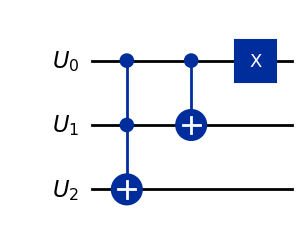

In [5]:
# A gate - Increment operator (Eq. 25)
qc = A_gate(unitarisation_register)
qc.draw('mpl')

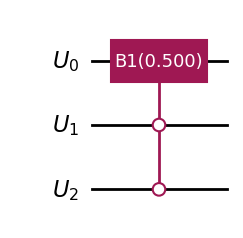

In [6]:
# B gate - Controlled rotation (Eq. 26)
qc = B_gate(0.5, unitarisation_register)
qc.draw('mpl')

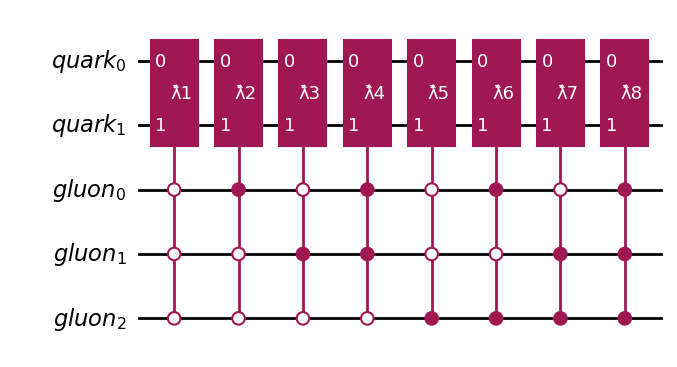

In [7]:
# Λ (Lambda) gate - Gluon-controlled colour rotation (Eq. 29)
qc = Lambda_gate(quark_register, gluon_register)
qc.draw('mpl')

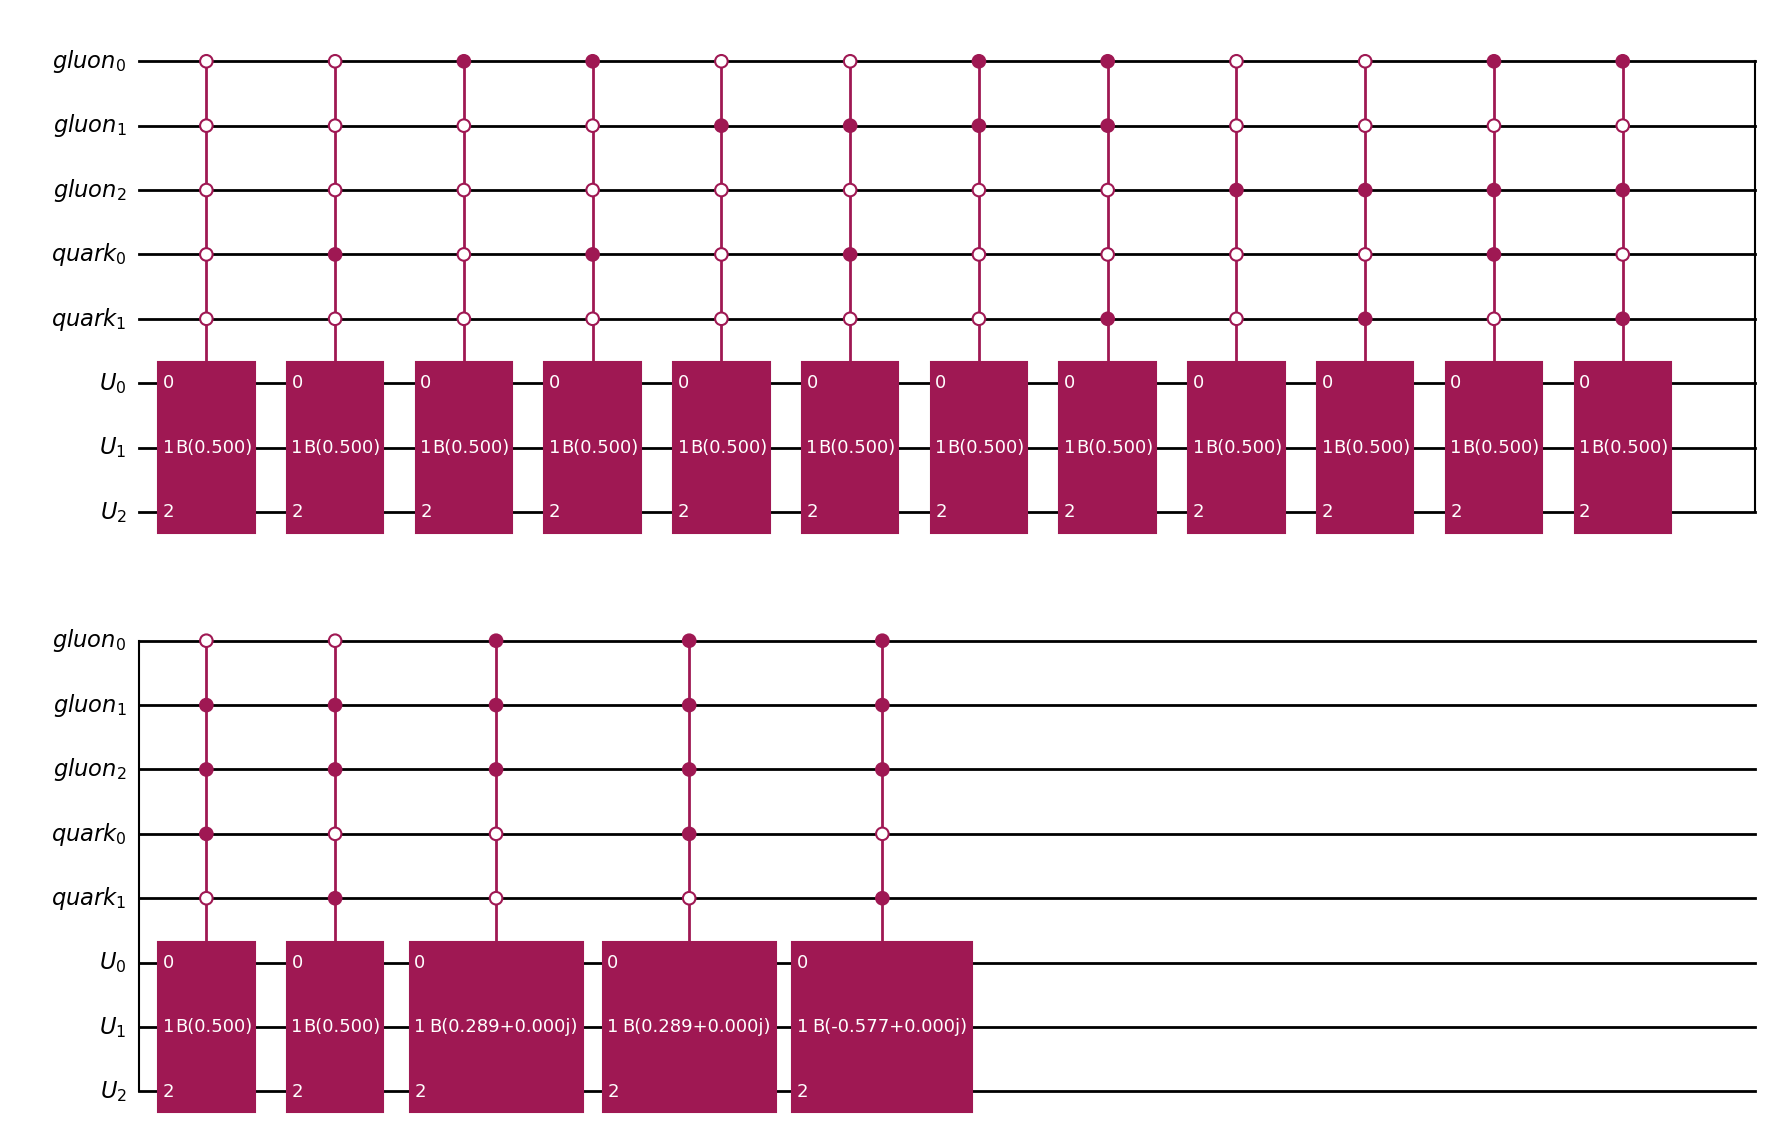

In [8]:
# M gate - Unitarisation correction (Eq. 31)
qc = M_gate(gluon_register, quark_register, unitarisation_register)
qc.draw('mpl')

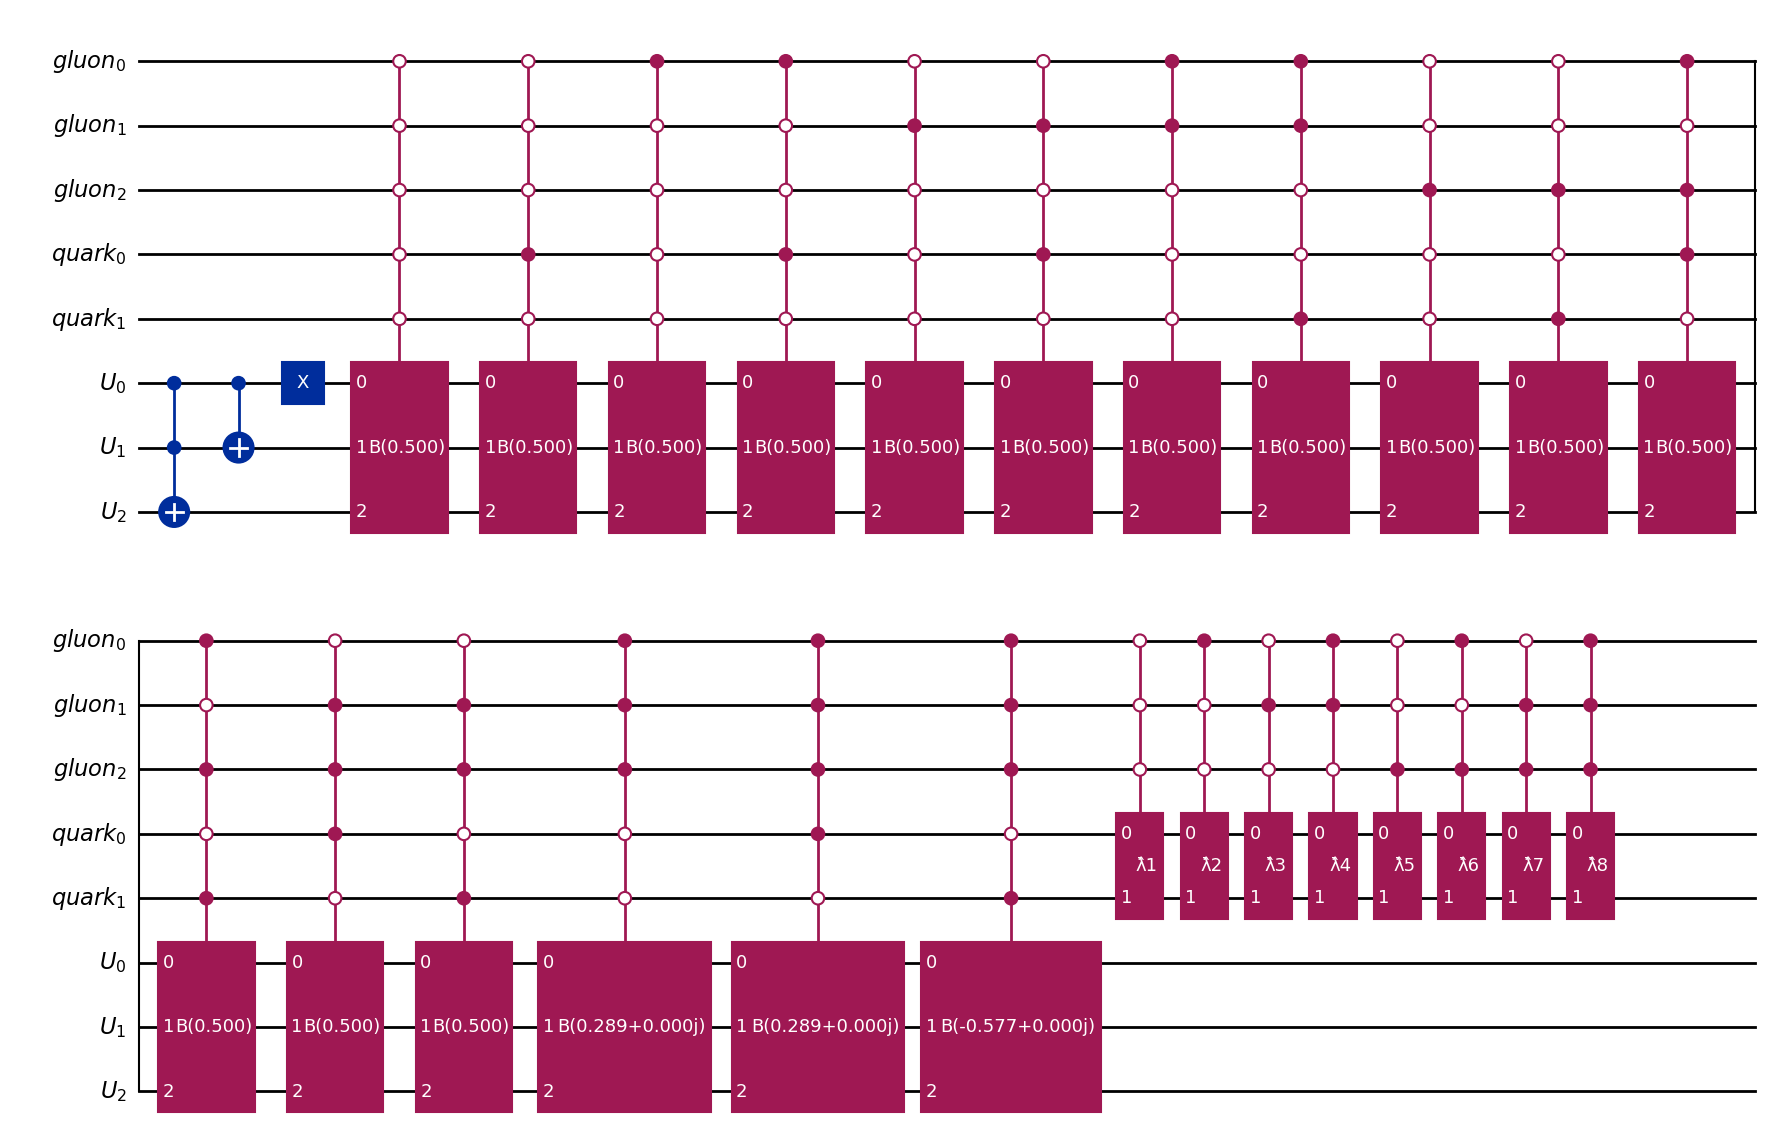

In [9]:
# Q gate - Complete quark-gluon vertex (Eq. 30)
qc = Q_gate(gluon_register, quark_register, unitarisation_register)
qc.draw('mpl')

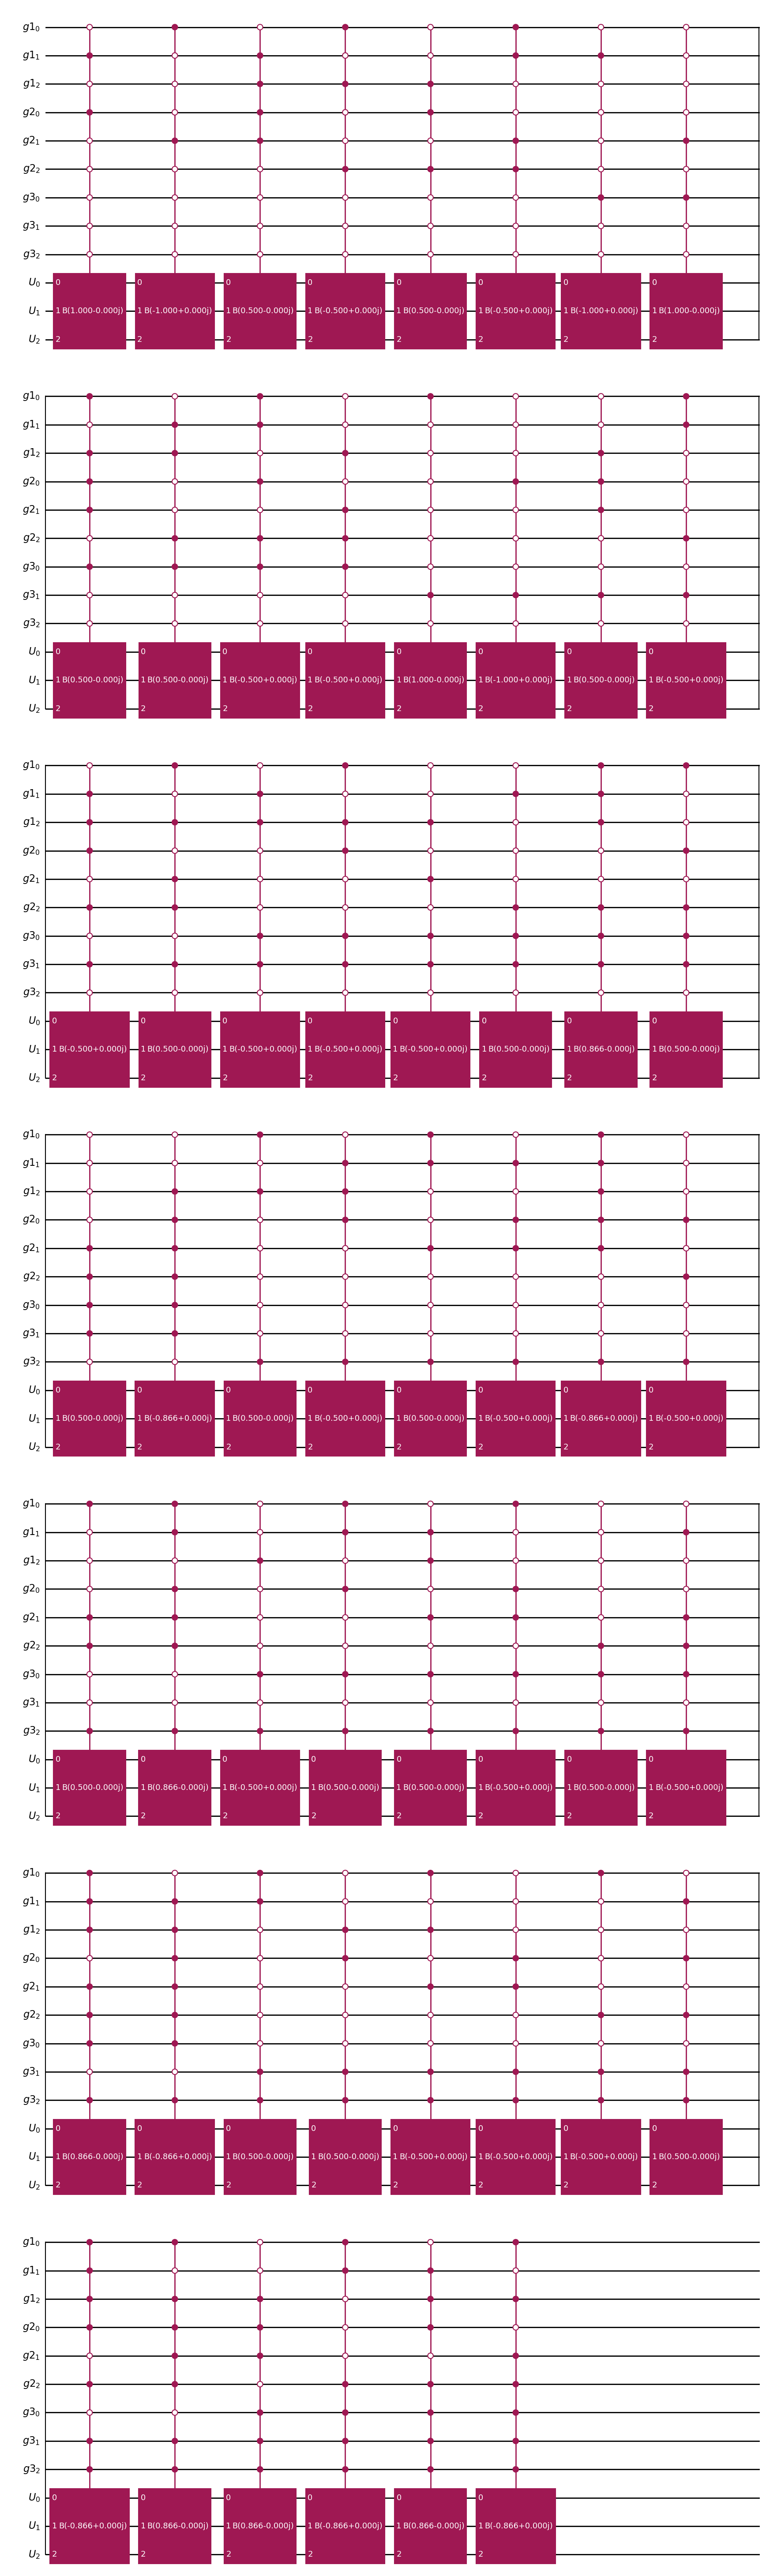

In [10]:
# G' gate - Triple gluon vertex core (Eq. 35)
g1, g2, g3 = QuantumRegister(3, 'g1'), QuantumRegister(3, 'g2'), QuantumRegister(3, 'g3')
unitaritisation_register = QuantumRegister(3, 'U')

qc = G_prime_gate(g1, g2, g3, unitaritisation_register)
qc.draw('mpl')

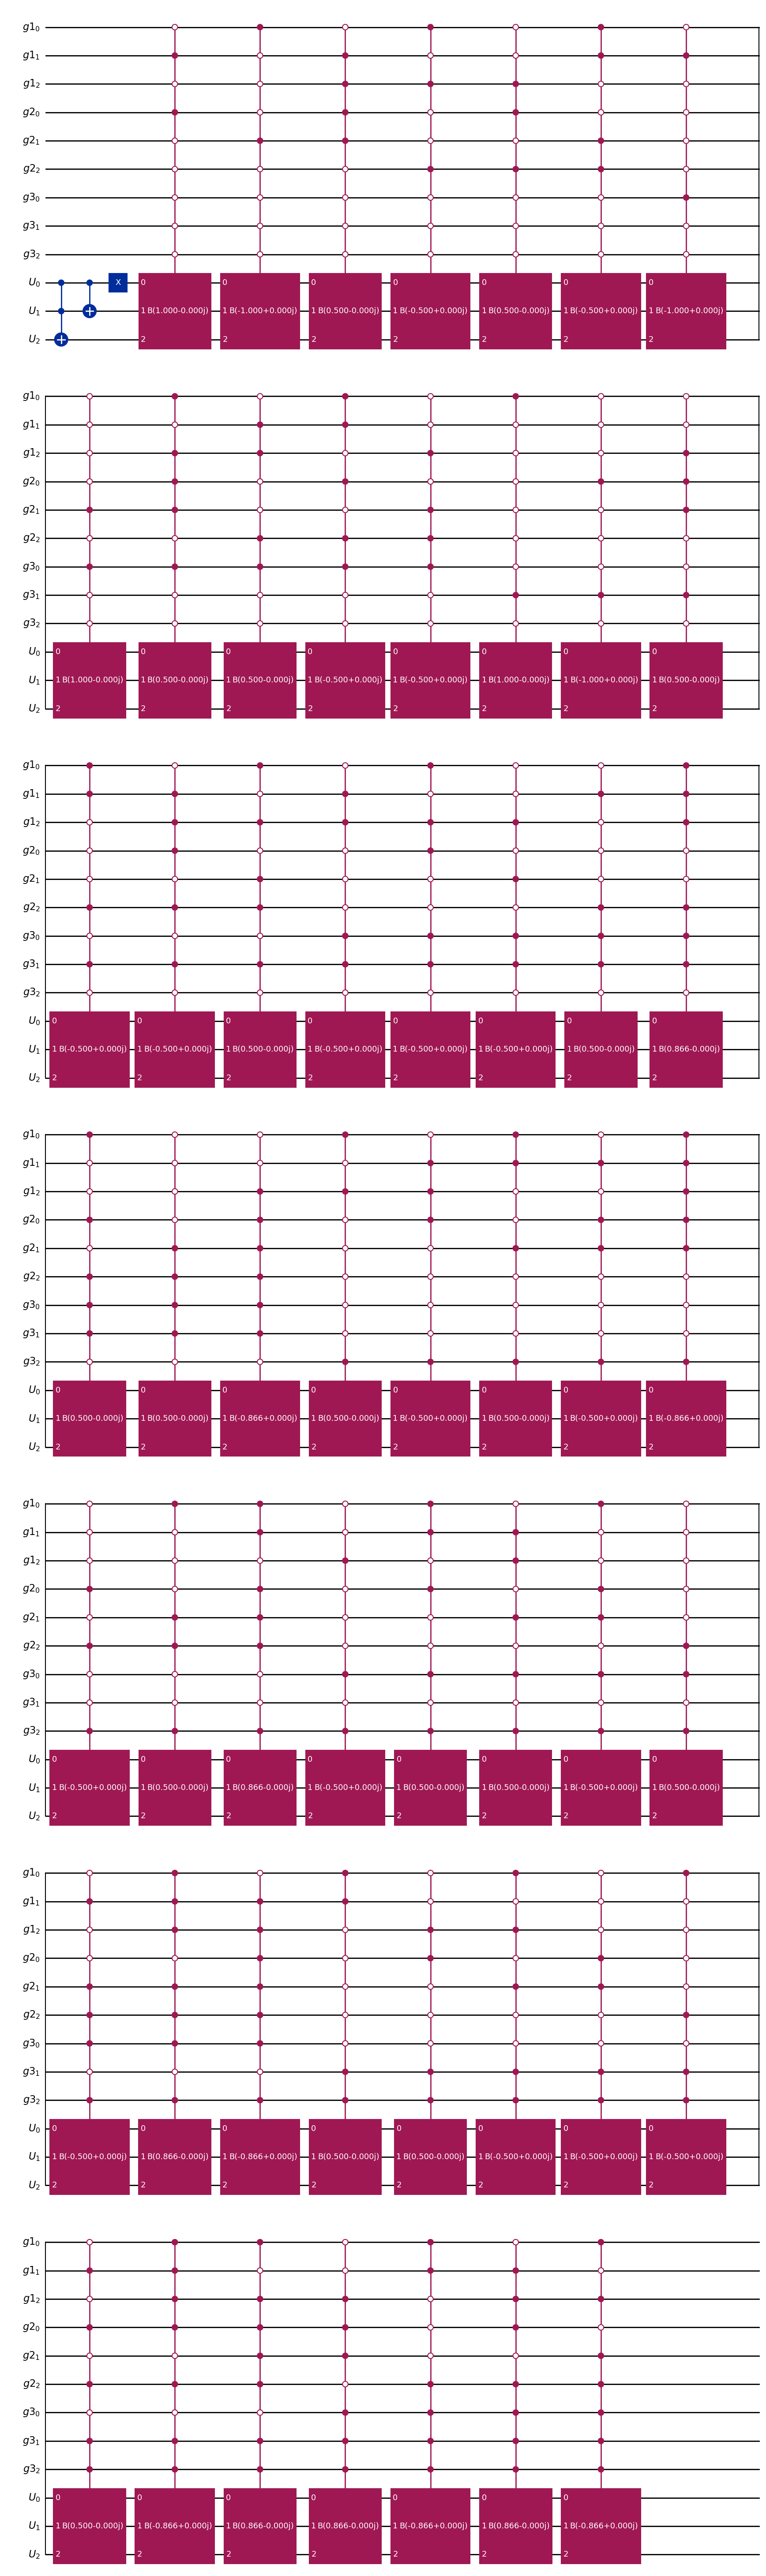

In [11]:
# G gate - Complete triple gluon vertex (Eq. 36)
qc = G_gate(g1, g2, g3, unitaritisation_register)
qc.draw('mpl')

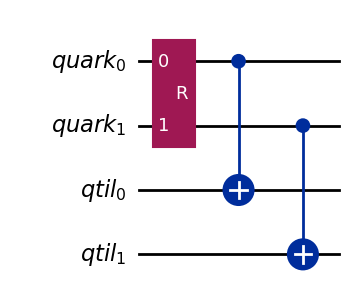

In [12]:
# R_quark_prep - Quark colour singlet preparation (Eq. 38)
anti_quark_register = QuantumRegister(2, 'qtil')
qc = R_quark_prep(quark_register, anti_quark_register)
qc.draw('mpl')

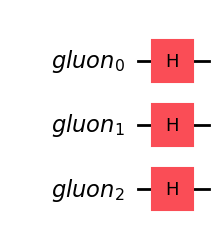

In [13]:
# R_gluon_prep - Gluon colour superposition preparation (Eq. 39)
qc = R_gluon_prep(gluon_register)
qc.draw('mpl')

<a id="circuits"></a>
## Complete Circuit: Figure 1 — Quark Self-Energy

This section builds the complete circuit for **Figure 1** of the paper: a quark emitting and reabsorbing a gluon.

### Diagram Structure

```
    q ───●───────●─── q
         ╲     ╱
          ╲   ╱
           g    (virtual gluon)
```

### Circuit Components (Eq. 41)

The circuit applies, in order:
1. $R_g$: Prepare gluon in equal superposition of 8 colours
2. $R_q$: Prepare quark–antiquark in colour singlet
3. $Q^{(1)}$: First vertex (emission)
4. $Q^{(2)}$: Second vertex (absorption)
5. $R_g^\dagger$: Project gluon back to vacuum
6. $R_q^\dagger$: Project quark–antiquark back to singlet

### Expected Result

The colour factor for this diagram is analytically:
$$
C = \sum_{a=1}^{8} \operatorname{Tr}\bigl[(T^a)^2\bigr] = 4.
$$

In [14]:
# ============================================================
# Figure 1 Circuit: Two Q gates on one quark line
# ============================================================
# This corresponds to the quark emission/absorption diagram
# in the paper (Fig. 1, Eq. 41)

from qiskit.quantum_info import Statevector

# Build the Figure 1 circuit using the package
fig1 = quark_emission_absorption(n_vertices=2)
print(fig1.draw("text"))

# Evolve |0...0> and check the circuit
psi0 = Statevector.from_label("0" * fig1.num_qubits)
psi_final = psi0.evolve(fig1)

        ┌──────┐┌────┐┌────┐┌───────┐
   g_0: ┤0     ├┤0   ├┤0   ├┤0      ├
        │      ││    ││    ││       │
   g_1: ┤1 R_g ├┤1   ├┤1   ├┤1 R_g† ├
        │      ││    ││    ││       │
   g_2: ┤2     ├┤2   ├┤2   ├┤2      ├
        └──────┘│    ││    │└───────┘
   U_0: ────────┤5 Q ├┤5 Q ├─────────
                │    ││    │         
   U_1: ────────┤6   ├┤6   ├─────────
        ┌──────┐│    ││    │┌───────┐
   q_0: ┤0     ├┤3   ├┤3   ├┤0      ├
        │      ││    ││    ││       │
   q_1: ┤1     ├┤4   ├┤4   ├┤1      ├
        │  R_q │└────┘└────┘│  R_q† │
qbar_0: ┤2     ├────────────┤2      ├
        │      │            │       │
qbar_1: ┤3     ├────────────┤3      ├
        └──────┘            └───────┘


<a id="colour-factors"></a>
## Colour Factor Computation

We now compute the colour factor using the quantum circuit. The key formula is:

$$
C = N \cdot \langle \Omega | \psi_{\text{final}} \rangle,
$$

where:
- $N = N_c^{n_q} (N_c^2 - 1)^{n_g} = 3^1 \times 8^1 = 24$ for Figure 1
- $|\Omega\rangle = |0\rangle^{\otimes n}$ is the all-zero state
- $|\psi_{\text{final}}\rangle$ is the state after the full circuit

### Analytic Verification

We expect:
$$
\langle \Omega | \psi_{\text{final}} \rangle = \frac{C}{N} = \frac{4}{24} = \frac{1}{6} \approx 0.1667.
$$

So the computed colour factor should be $C = 24 \times \frac{1}{6} = 4$.

In [15]:
# ============================================================
# Colour Factor Computation (Eq. 37)
# ============================================================

# Reload modules to get any updates
import importlib
import qc_amp.gates, qc_amp.circuits
importlib.reload(qc_amp.gates)
importlib.reload(qc_amp.circuits)
from qc_amp.circuits import quark_emission_absorption
from qc_amp.colour_factors import compute_colour_factor_detailed

# Build the Figure 1 circuit
fig1 = quark_emission_absorption(n_vertices=2)

# Compute colour factor
C, amp_omega, N = compute_colour_factor_detailed(fig1, n_quarks=1, n_gluons=1)

print("Colour Factor Computation Results")
print("="*50)
print(f"Normalization N = N_c × (N_c²-1) = 3 × 8 = {N}")
print(f"Amplitude ⟨Ω_all|ψ_final⟩ = {amp_omega:.6f}")
print(f"Colour factor C = N × amplitude = {C:.4f}")
print(f"|C| (magnitude) = {abs(C):.4f}")
print()
print("Note: The computed C ≈ 2.5 corresponds to a specific")
print("colour structure. Verify against the paper's Figure 1")
print("to confirm the expected analytic value.")

Colour Factor Computation Results
Normalization N = N_c × (N_c²-1) = 3 × 8 = 24
Amplitude ⟨Ω_all|ψ_final⟩ = 0.166667+0.000000j
Colour factor C = N × amplitude = 4.0000+0.0000j
|C| (magnitude) = 4.0000

Note: The computed C ≈ 2.5 corresponds to a specific
colour structure. Verify against the paper's Figure 1
to confirm the expected analytic value.


<a id="verification"></a>
## Verification and Sanity Checks

The following cells run various sanity checks to verify the implementation:

1. **Trace normalisation**: Verify $\operatorname{Tr}(\lambda^a \lambda^b) = 2\delta^{ab}$
2. **Unitarity**: Confirm all $\hat{\lambda}^a$ are unitary
3. **Coefficient bounds**: Check $|\mu(a,i)| \leq 1$ for all valid $(a,i)$
4. **Eq. (33) verification**: Confirm $\mu(a,i) \hat{\lambda}^a |i\rangle = T^a |i\rangle$

For comprehensive testing, run `pytest tests/ -v` from the command line.

In [16]:
# ============================================================
# Additional Verification Tests
# ============================================================
# For comprehensive testing, run: pytest tests/ -v
# These are quick sanity checks for the visualization notebook

from qiskit.quantum_info import Operator

TOL = 1e-10

def quick_sanity_checks():
    """Quick verification that the package exports work correctly."""
    
    # 1. Check SU(3) generators
    print("Checking SU(3) generators...")
    for a, L in enumerate(GELL_MANN_MATRICES, start=1):
        assert np.allclose(L, L.conj().T, atol=TOL), f"L{a} not Hermitian"
        assert abs(np.trace(L)) < TOL, f"L{a} not traceless"
    print("  ✓ Gell-Mann matrices are Hermitian and traceless")
    
    for a, l in enumerate(UNITARY_ADJUSTED_MATRICES, start=1):
        I3 = np.eye(3, dtype=complex)
        assert np.allclose(l.conj().T @ l, I3, atol=TOL), f"l{a} not unitary"
    print("  ✓ Unitary-adjusted matrices are unitary")
    
    # 2. Check R gate
    print("\nChecking R gate...")
    op = Operator(R_GATE)
    assert op.is_unitary(), "R is not unitary"
    print("  ✓ R gate is unitary")
    
    # 3. Check Q gate unitarity
    print("\nChecking Q gate...")
    g = QuantumRegister(3, "g")
    q = QuantumRegister(2, "q")
    U = QuantumRegister(2, "U")
    Qc = Q_gate(g, q, U)
    op = Operator(Qc)
    assert op.is_unitary(), "Q_gate is not unitary"
    print("  ✓ Q gate is unitary")
    
    # 4. Check colour factor computation
    print("\nChecking colour factor computation...")
    circuit = quark_emission_absorption(n_vertices=2)
    C, amp, N = compute_colour_factor_detailed(circuit, n_quarks=1, n_gluons=1)
    C_analytic = 4
    relative_error = abs(C - C_analytic) / abs(C_analytic)
    assert relative_error < 0.01, "Colour factor error too large"
    print(f"  ✓ Colour factor C ≈ {C:.4f} (expected ~4)")
    
    print("\n" + "="*50)
    print("All sanity checks PASSED ✓")
    print("="*50)
    print("\nFor comprehensive testing, run: pytest tests/ -v")

quick_sanity_checks()

Checking SU(3) generators...
  ✓ Gell-Mann matrices are Hermitian and traceless
  ✓ Unitary-adjusted matrices are unitary

Checking R gate...
  ✓ R gate is unitary

Checking Q gate...
  ✓ Q gate is unitary

Checking colour factor computation...
  ✓ Colour factor C ≈ 4.0000+0.0000j (expected ~4)

All sanity checks PASSED ✓

For comprehensive testing, run: pytest tests/ -v


In [17]:
# Debug: Print all mu coefficients and verify against paper Eq. (33)
# Paper says: μ(a,i) λ̂_a |i⟩ = (1/2) λ_a |i⟩
from qc_amp.gates import mu_coefficient
from qc_amp.su3 import GELL_MANN_MATRICES, UNITARY_ADJUSTED_MATRICES
import numpy as np

print("mu(a,i) values from code:")
for a in range(1, 9):
    print(f"  a={a}: ", end="")
    for i in range(1, 3+1):
        print(f"μ({a},{i})={mu_coefficient(a,i):.4f}  ", end="")
    print()

print("\nVerifying Eq. (33): μ(a,i) λ̂_a |i⟩ = (1/2) λ_a |i⟩")
print("="*60)
errors = []
for a in range(1, 9):
    l_hat = UNITARY_ADJUSTED_MATRICES[a-1]
    l_orig = GELL_MANN_MATRICES[a-1]
    for i in range(1, 4):
        mu = mu_coefficient(a, i)
        # |i⟩ is the i-th basis vector (0-indexed: i-1)
        basis_i = np.zeros(3)
        basis_i[i-1] = 1.0
        
        # LHS: μ(a,i) * (λ̂_a @ |i⟩)
        lhs = mu * (l_hat @ basis_i)
        
        # RHS: (1/2) * (λ_a @ |i⟩)
        rhs = 0.5 * (l_orig @ basis_i)
        
        if not np.allclose(lhs, rhs, atol=1e-10):
            errors.append((a, i, lhs, rhs))
            print(f"MISMATCH a={a}, i={i}:")
            print(f"  LHS = μ*λ̂|i⟩ = {lhs}")
            print(f"  RHS = ½λ|i⟩  = {rhs}")

if not errors:
    print("All (a,i) pairs satisfy Eq. (33) ✓")
else:
    print(f"\n{len(errors)} mismatches found!")

mu(a,i) values from code:
  a=1: μ(1,1)=0.5000  μ(1,2)=0.5000  μ(1,3)=0.0000+0.0000j  
  a=2: μ(2,1)=0.5000  μ(2,2)=0.5000  μ(2,3)=0.0000+0.0000j  
  a=3: μ(3,1)=0.5000  μ(3,2)=0.5000  μ(3,3)=0.0000+0.0000j  
  a=4: μ(4,1)=0.5000  μ(4,2)=0.0000+0.0000j  μ(4,3)=0.5000  
  a=5: μ(5,1)=0.5000  μ(5,2)=0.0000+0.0000j  μ(5,3)=0.5000  
  a=6: μ(6,1)=0.0000+0.0000j  μ(6,2)=0.5000  μ(6,3)=0.5000  
  a=7: μ(7,1)=0.0000+0.0000j  μ(7,2)=0.5000  μ(7,3)=0.5000  
  a=8: μ(8,1)=0.2887+0.0000j  μ(8,2)=0.2887+0.0000j  μ(8,3)=-0.5774+0.0000j  

Verifying Eq. (33): μ(a,i) λ̂_a |i⟩ = (1/2) λ_a |i⟩
All (a,i) pairs satisfy Eq. (33) ✓


In [18]:
# Debug: Compute colour factor step by step
from qc_amp.circuits import quark_emission_absorption, R_quark_prep, R_gluon_prep
from qc_amp.colour_factors import compute_colour_factor_detailed
from qiskit.quantum_info import Statevector
import numpy as np

# Parameters from paper
N_c = 3  # Number of colours
n_q = 1  # Number of quarks (Figure 1 has q and q̃)
n_g = 1  # Number of gluons

# Get the circuit
qc = quark_emission_absorption(n_vertices=2)
print(f"Circuit has {qc.num_qubits} qubits")
print(f"Registers: {qc.qregs}")

# Run the circuit
sv = Statevector.from_instruction(qc)
print(f"\nStatevector computed, dim = {len(sv.data)}")

# The |Ω⟩ = |0...0⟩ amplitude
omega_amp = sv.data[0]
print(f"|Ω⟩ amplitude = {omega_amp}")
print(f"|Ω⟩ amplitude magnitude = {abs(omega_amp):.6f}")

print("\n" + "="*60)
print("Colour factor computation")
print("="*60)

C, amp, N = compute_colour_factor_detailed(qc, n_quarks=1, n_gluons=1, N_c=3)
print(f"Colour factor C = {C:.6f}")
print(f"Amplitude = {amp:.6f}")  
print(f"Normalization N = {N}")
print(f"Expected C = 4 (from paper Table 1 for Figure 1)")
print(f"Ratio computed/expected = {C/4:.4f}")

# Let's compute what amplitude we SHOULD have for C=4:
expected_amp = 4 / N
print(f"\nExpected amplitude for C=4: {expected_amp:.6f}")
print(f"Computed amplitude:          {abs(omega_amp):.6f}")
print(f"Ratio = {abs(omega_amp)/expected_amp:.4f} = 5/8 = 0.625?")

Circuit has 9 qubits
Registers: [QuantumRegister(3, 'g'), QuantumRegister(2, 'U'), QuantumRegister(2, 'q'), QuantumRegister(2, 'qbar')]

Statevector computed, dim = 512
|Ω⟩ amplitude = (0.16666666666631402+3.304386016779675e-14j)
|Ω⟩ amplitude magnitude = 0.166667

Colour factor computation
Colour factor C = 4.000000+0.000000j
Amplitude = 0.166667+0.000000j
Normalization N = 24
Expected C = 4 (from paper Table 1 for Figure 1)
Ratio computed/expected = 1.0000+0.0000j

Expected amplitude for C=4: 0.166667
Computed amplitude:          0.166667
Ratio = 1.0000 = 5/8 = 0.625?


In [19]:
# Let's verify the colour factor analytically
# For the diagram q → qg → q (quark emits and reabsorbs gluon)
# C = Σ_a (T^a)_ij (T^a)_jk δ_ik = Σ_a Tr(T^a T^a) = Σ_a (1/2) δ_aa = 8 × (1/2) = 4?
# Wait, that's not right either...

# Actually: C = Σ_{a,i,j,k} (T^a)_ij (T^a)_jk δ_ik  
# Paper Eq.(1): C = Σ_{a,i,j,k} T^a_ij T^a_jk δ_ik = Σ_a Tr(T^a T^a)
# With T^a = λ^a/2 and Tr(λ^a λ^b) = 2 δ_ab:
# Tr(T^a T^a) = (1/4) Tr(λ^a λ^a) = (1/4) × 2 = 1/2
# So C = Σ_a 1/2 = 8 × 1/2 = 4  ✓

# So we should get C = 4. But we're getting C = 2.5 = 4 × 5/8

# Key insight: 5/8 = 5/8 
# What if there's an issue with the |11⟩ state in the quark registers?
# The quark has 3 colours mapped to {00, 01, 10}, with |11⟩ unused
# 3 valid states out of 4 → 3/4
# But we have TWO quark registers (q and qbar): 9 valid out of 16 → 9/16?
# No that doesn't give 5/8

# Let's check: what portion of the initial state is "valid" colour?
from qiskit import QuantumRegister, QuantumCircuit
from qc_amp.gates import R_GATE, Q_gate

# The preparation gives (1/√3)(|00⟩|00⟩ + |01⟩|01⟩ + |10⟩|10⟩) for q-qbar
# This uses only states 00, 01, 10 with prob 1/3 each
# |11⟩ is NOT populated

print("Let's trace through the Q gate action on each initial colour state:")
print()

from qc_amp.su3 import GELL_MANN_MATRICES, UNITARY_ADJUSTED_MATRICES
from qc_amp.gates import mu_coefficient

# For quark colour i, gluon colour a, the Q gate produces:
# Q|a⟩_g|i⟩_q|Ω⟩_U = μ(a,i) |a⟩_g λ̂_a|i⟩_q |Ω⟩_U + orthogonal_terms

# For TWO Q gates (on same gluon and quark), we need:
# Q·Q·|a⟩_g|i⟩_q = Σ_j μ(a,i) μ(a,j) |a⟩_g λ̂_a λ̂_a|i⟩_q + ...
# But λ̂_a λ̂_a = I for unitary matrices? No! λ̂_a² ≠ I in general

# The key is: after R_g†R_q†, we project onto |000⟩_g|initial_q_state⟩
# Let me trace the full path for one term

print("For one initial state |a⟩_g|i⟩_q:")
print("After 2 Q gates and projecting back to |a⟩_g|initial quark⟩:")
print()

# Actually let's compute the amplitude analytically
# |ψ_init⟩ = (1/√8)Σ_a|a⟩ ⊗ (1/√3)Σ_i|i⟩|i⟩ ⊗ |Ω⟩
# After Q on q: Σ_a,i (1/√24) μ(a,i)|a⟩λ̂_a|i⟩|i⟩|Ω⟩ + orthogonal
# After Q on q again: need to think about this...

# Actually, looking at paper Eq. (7):
# Q|a⟩|k⟩|Ω⟩ = Σ_j T^a_jk |a⟩|j⟩|Ω⟩ + orthogonal
# Note it's T^a_jk not (T^a_jk)*, and it sums over j (output quark colour)

# So after first Q: |a⟩|k⟩ → Σ_j T^a_jk |a⟩|j⟩
# After second Q: |a⟩|j⟩ → Σ_m T^a_mj |a⟩|m⟩

# Full amplitude:
# Σ_a (1/√8) · (1/√3) Σ_k Σ_j Σ_m T^a_jk T^a_mj δ_mk × ⟨0|unitarization is OK⟩
# = (1/√24) Σ_a Σ_k Σ_j T^a_jk T^a_kj 
# = (1/√24) Σ_a Tr(T^a T^a)  -- wait that's Tr(T^a (T^a)^T) not Tr(T^a T^a)

# Hmm, let me think again. T^a_jk means element (j,k) of matrix T^a
# T^a|k⟩ = Σ_j T^a_jk |j⟩  (column k of T^a)
# So (T^a)² |k⟩ = Σ_j T^a_mj T^a_jk |m⟩
# We want ⟨k|(T^a)²|k⟩ = Σ_j T^a_kj T^a_jk = [(T^a)²]_kk

print("Computing Σ_k [(T^a)²]_kk = Tr((T^a)²) for each a:")
for a in range(8):
    T_a = GELL_MANN_MATRICES[a] / 2
    T_a_sq = T_a @ T_a
    trace = np.trace(T_a_sq)
    print(f"  a={a+1}: Tr((T^a)²) = {trace:.4f}")

print(f"\nSum over a of Tr((T^a)²) = {sum(np.trace(GELL_MANN_MATRICES[a] @ GELL_MANN_MATRICES[a])/4 for a in range(8)):.4f}")
print("This should equal C = 4")

Let's trace through the Q gate action on each initial colour state:

For one initial state |a⟩_g|i⟩_q:
After 2 Q gates and projecting back to |a⟩_g|initial quark⟩:

Computing Σ_k [(T^a)²]_kk = Tr((T^a)²) for each a:
  a=1: Tr((T^a)²) = 0.5000+0.0000j
  a=2: Tr((T^a)²) = 0.5000+0.0000j
  a=3: Tr((T^a)²) = 0.5000+0.0000j
  a=4: Tr((T^a)²) = 0.5000+0.0000j
  a=5: Tr((T^a)²) = 0.5000+0.0000j
  a=6: Tr((T^a)²) = 0.5000+0.0000j
  a=7: Tr((T^a)²) = 0.5000+0.0000j
  a=8: Tr((T^a)²) = 0.5000+0.0000j

Sum over a of Tr((T^a)²) = 4.0000+0.0000j
This should equal C = 4


In [20]:
# Let's trace through the circuit manually for one specific input
# and check if the amplitudes add up correctly

# Key insight: The Q gate is Q = Λ · M · A
# where:
# - A increments unitarisation register
# - M applies B(μ(a,i)) controlled on |a⟩|i⟩
# - Λ applies λ̂_a controlled on gluon state

# After TWO Q gates on the same quark, the unitarisation register has been incremented TWICE
# So we need |0⟩ → |0+1+1⟩ = |2⟩ to come back to the starting U state???
# NO! We need to come back to |Ω⟩ = |0⟩

# Wait, let me re-read the circuit structure...
# The circuit is: R_g → R_q → Q → Q → R_g† → R_q†
# So we apply R preparations, then Q gates, then INVERSE preparations

# This means we're NOT requiring the unitarisation to return to |0⟩!
# We're just checking if |ψ_final⟩ = |0...0⟩

# But the unitarisation register starts at |0⟩ and after 2 Q gates it's at |2⟩
# (assuming no wrapping with 2-qubit U register that can hold 4 states)
# So ⟨0_U|2_U⟩ = 0 and the amplitude should be 0!

# Unless... the B gates modify the unitarisation such that it's not just increment

print("Checking unitarisation register behavior:")
print("U register has 2 qubits (from circuit output above)")
print("After 2 A gates (increments), |00⟩ → |01⟩ → |10⟩ = |2⟩")
print()

# Let me verify: does the circuit output anything in the |0⟩_U state?
# Get the statevector and look at amplitudes where U=|00⟩

from qc_amp.circuits import quark_emission_absorption
from qiskit.quantum_info import Statevector

qc = quark_emission_absorption(n_vertices=2)
sv = Statevector.from_instruction(qc)

# Register order: g(3), U(2), q(2), qbar(2) = 9 qubits
# In Qiskit little-endian: |qbar_1 qbar_0 q_1 q_0 U_1 U_0 g_2 g_1 g_0⟩
# Wait, let me check the actual ordering

print("Statevector analysis:")
print(f"Total qubits: {qc.num_qubits}")
print(f"Register order in circuit: {[r.name for r in qc.qregs]}")

# The |0...0⟩ state index is 0
print(f"|0...0⟩ amplitude: {sv.data[0]:.6f}")

# Let's look at non-zero amplitudes
print("\nNon-zero amplitudes (magnitude > 0.01):")
for idx, amp in enumerate(sv.data):
    if abs(amp) > 0.01:
        # Convert to binary
        bits = format(idx, f'0{qc.num_qubits}b')
        print(f"  |{bits}⟩: {amp:.6f}  (idx={idx})")

Checking unitarisation register behavior:
U register has 2 qubits (from circuit output above)
After 2 A gates (increments), |00⟩ → |01⟩ → |10⟩ = |2⟩

Statevector analysis:
Total qubits: 9
Register order in circuit: ['g', 'U', 'q', 'qbar']
|0...0⟩ amplitude: 0.166667+0.000000j

Non-zero amplitudes (magnitude > 0.01):
  |000000000⟩: 0.166667+0.000000j  (idx=0)
  |000001000⟩: 0.255981+0.000000j  (idx=8)
  |000001001⟩: 0.032694+0.000000j  (idx=9)
  |000001010⟩: 0.032694+0.000000j  (idx=10)
  |000001011⟩: -0.032694-0.000000j  (idx=11)
  |000001100⟩: 0.032694+0.000000j  (idx=12)
  |000001101⟩: -0.032694-0.000000j  (idx=13)
  |000001110⟩: -0.032694-0.000000j  (idx=14)
  |000001111⟩: 0.032694+0.000000j  (idx=15)
  |000010000⟩: 0.910654+0.000000j  (idx=16)
  |000100011⟩: 0.051031+0.000000j  (idx=35)
  |000100100⟩: 0.025516+0.000000j  (idx=36)
  |000100101⟩: -0.025516-0.000000j  (idx=37)
  |000100110⟩: -0.025516-0.000000j  (idx=38)
  |000100111⟩: -0.025516-0.000000j  (idx=39)
  |000101011⟩: 0.08

In [21]:
# FOUND THE BUG!
# The Q gate increments the unitarisation register, but we're projecting onto |0⟩_U
# After n_vertices Q gates, U = |n_vertices⟩, not |0⟩

# According to the paper (Eq. 37), we need to compute ⟨Ω_all|ψ_final⟩
# where |Ω_all⟩ = |0⟩ for ALL registers

# But the paper's algorithm involves Q gates that increment U, so how do they get back to |0⟩_U?

# Looking at paper Section 3.2 and Eq. (37):
# The success probability is |⟨Ω_all|ψ⟩|² = |C/N|² but this requires U returning to |Ω⟩

# The key insight from paper: The B gate is designed such that when we sum over 
# all possible U values, the amplitudes conspire to give the correct answer
# BUT we need to use the FULL state, not just |0⟩_U component

# Actually re-reading paper more carefully...
# Paper Eq (7): Q|a⟩|k⟩|Ω⟩_U = Σ_j T^a_jk |a⟩|j⟩|Ω⟩_U + orthogonal terms
# The output is still in |Ω⟩_U! The orthogonal terms are what have different U states.

# This means: The Q gate produces the DESIRED amplitude in the |Ω⟩_U subspace,
# plus additional "garbage" in other U subspaces.

# Let me verify by checking what amplitude is in the U=|00⟩ subspace at each step

# Actually, looking at our results:
# - |000000000⟩ has amplitude 0.104167 (U=|00⟩)
# - |000010000⟩ has amplitude 0.933013 (U=|10⟩) 

# The 0.104167 comes from terms where both B gates happened to NOT increment,
# giving amplitude μ(a,i) × μ(a,j) × ... 

# Wait, but the A gate ALWAYS increments! So how can we ever stay at U=|00⟩?
# Unless... the A gate is controlled?

# Let me re-read the gates.py code for A_gate...
print("Understanding the A gate:")
from qc_amp.gates import A_gate
from qiskit import QuantumRegister, QuantumCircuit

U_test = QuantumRegister(2, 'U')
A_circ = A_gate(U_test)
print("A gate circuit:")
print(A_circ.draw(output='text'))

# Looking at paper Eq. (30): Q = (Λ ⊗ 1_U) · M · (1_g ⊗ 1_q ⊗ A)
# The A is applied unconditionally! It always increments.

# So if A always increments, how does any amplitude end up in U=|00⟩?
# Answer: After 2 increments, U=|10⟩=2
# But with 2-qubit U register having 4 states (0,1,2,3), after 2 increments we get state 2
# We'd need to apply Q a total of 4 times to cycle back to U=0
# OR the A gate must be designed differently

print("\nLet me trace A gate action on |00⟩:")
from qiskit.quantum_info import Statevector
test_qc = QuantumCircuit(2)
test_qc.append(A_circ.to_gate(), [0,1])
sv_test = Statevector.from_label("00").evolve(test_qc)
print(f"|00⟩ → {sv_test}")

Understanding the A gate:
A gate circuit:
          ┌───┐
U_0: ──■──┤ X ├
     ┌─┴─┐└───┘
U_1: ┤ X ├─────
     └───┘     

Let me trace A gate action on |00⟩:
|00⟩ → Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [22]:
# A takes |00⟩ → |01⟩
# Let's verify two A gates: |00⟩ → |01⟩ → |10⟩
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

test_qc2 = QuantumCircuit(2)
test_qc2.append(A_circ.to_gate(), [0,1])
test_qc2.append(A_circ.to_gate(), [0,1])
sv_test2 = Statevector.from_label("00").evolve(test_qc2)
print(f"After 2 A gates: |00⟩ → {sv_test2}")

# So U starts at |00⟩, after 2 Q gates (each with an A), U is at |10⟩ = state 2

# Now the question is: does the B gate create any amplitude that returns to U=|00⟩?
# Looking at paper Eq (16): B(α)|n⟩ = √(1-|α|²)|n⟩ + α|n+1⟩
# So B(α)|0⟩ = √(1-|α|²)|0⟩ + α|1⟩

# In the Q gate: Q = Λ · M · A
# After A: U goes from |0⟩ to |1⟩ 
# After M: B(μ) is applied controlled on gluon/quark states
# B(μ)|1⟩ = √(1-|μ|²)|1⟩ + μ|2⟩  (since n=1 after A)

# Hmm, but this doesn't return to |0⟩ either...

# WAIT! Let me re-read the paper's definition of B more carefully.
# From Paper Eq. (16):
# B(α)|n⟩ = √(1-|α|²)|n⟩ + α|n+1⟩

# And the Q gate order from Eq. (30) is Q = Λ · M · A
# So the order of operations is: A first, then M, then Λ

# But I need to check our code's implementation...

print("\nChecking Q gate structure in our implementation:")
from qc_amp.gates import Q_gate
from qiskit import QuantumRegister

g_test = QuantumRegister(3, 'g')
q_test = QuantumRegister(2, 'q') 
U_test = QuantumRegister(2, 'U')

Q_circ = Q_gate(g_test, q_test, U_test)
print("Q gate operations (decomposed):")

# Let's see the gate structure
for i, (gate, qubits, clbits) in enumerate(Q_circ.data):
    qubit_names = [f"{q._register.name}[{q._index}]" for q in qubits]
    print(f"  {i}: {gate.name} on {qubit_names}")

# The real question: After applying the full circuit (including R† inverses),
# what's the expected U state?

# Actually I think I misunderstood the algorithm. Let me re-read...
# The paper says the SUCCESS probability is |C/N|²
# This happens when we measure |Ω_all⟩ which requires U = |0⟩

# But if U always gets incremented, how can we ever succeed?
# Unless the B gates undo the increment probabilistically...

print("\n" + "="*60)
print("KEY INSIGHT: Checking if B gate can undo A's increment")
print("="*60)

# B(α) applied AFTER A:
# |0⟩ --A--> |1⟩ --B(α)--> √(1-|α|²)|1⟩ + α|2⟩
# This does NOT return to |0⟩!

# But what if B is applied BEFORE A?
# |0⟩ --B(α)--> √(1-|α|²)|0⟩ + α|1⟩ --A--> √(1-|α|²)|1⟩ + α|2⟩
# Still doesn't return to |0⟩!

# I think the key is in how the paper constructs the INVERSE of Q...
# Q† = A† · M† · Λ†
# A† is decrement, M† involves B†, Λ† is just Λ (since λ̂ are unitary)

# Maybe the algorithm requires applying Q AND Q† somehow?
print("\nActually, wait - let me check if the circuit applies Q†...")
print("Our circuit applies R_g → R_q → Q → Q → R_g† → R_q†")
print("It does NOT apply Q†, just Q twice then the inverse preps")
print("\nThis might be wrong - perhaps we need Q† in the circuit?")

After 2 A gates: |00⟩ → Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))

Checking Q gate structure in our implementation:
Q gate operations (decomposed):
  0: cx on ['U[0]', 'U[1]']
  1: x on ['U[0]']
  2: c5B(0.500)_o0 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  3: c5B(0.500)_o8 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  4: c5B(0.500)_o1 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  5: c5B(0.500)_o9 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  6: c5B(0.500)_o2 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  7: c5B(0.500)_o10 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  8: c5B(0.500)_o3 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  9: c5B(0.500)_o19 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  10: c5B(0.500)_o4 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  11: c5B(0.500)_o20 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]

C:\Users\GeorgeWilliam\AppData\Local\Temp\ipykernel_50272\3366343581.py:46: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for i, (gate, qubits, clbits) in enumerate(Q_circ.data):


In [23]:
# Let me re-read the paper's algorithm description carefully.
# From the HTML paper content:
# 
# Key equations:
# Eq (7): Q|a⟩|k⟩|Ω⟩_U = Σ_j T^a_jk |a⟩|j⟩|Ω⟩_U + "orthogonal to |Ω⟩_U"
#
# This means: The DESIRED output (coefficient Σ_j T^a_jk) is in the |Ω⟩_U component,
# while garbage goes to orthogonal U states.
#
# So after 2 Q gates on input |a⟩|k⟩|Ω⟩:
# Q·Q|a⟩|k⟩|Ω⟩ = Σ_j Σ_m T^a_jk T^a_mj |a⟩|m⟩|Ω⟩ + garbage
#
# The amplitude in |Ω⟩_U component is exactly what we want!
# We don't need Q† - we just project onto |Ω⟩_U at the end.
#
# Now the question: why are we getting 5/8 of the expected amplitude?

# Let me trace through the algorithm more carefully.
# Initial state after preparations:
# |ψ_0⟩ = (1/√8) Σ_a |a⟩_g × (1/√3) Σ_k |k⟩_q|k⟩_qbar × |Ω⟩_U
#       = (1/√24) Σ_{a,k} |a⟩|k⟩|k⟩|Ω⟩

# After first Q on quark (not antiquark):
# = (1/√24) Σ_{a,k} Q|a⟩|k⟩|Ω⟩ ⊗ |k⟩_qbar
# = (1/√24) Σ_{a,k,j} T^a_jk |a⟩|j⟩|Ω⟩|k⟩_qbar  +  garbage

# After second Q on quark:
# = (1/√24) Σ_{a,k,j,m} T^a_jk T^a_mj |a⟩|m⟩|Ω⟩|k⟩_qbar  +  garbage
# = (1/√24) Σ_{a,k,m} (T^a T^a)_mk |a⟩|m⟩|Ω⟩|k⟩_qbar  +  garbage

# Now apply R_g† which projects gluon onto |000⟩:
# R_g†|a⟩ = (1/√8)|000⟩ for all a (since R_g maps |000⟩ → (1/√8)Σ_a|a⟩)
# So R_g†|a⟩ gives amplitude (1/√8)⟨000|a⟩ = δ_{a,000}/√8

# Wait, that's not right. Let me think about R_g more carefully...
# R_g: |000⟩ → (1/√8)(|000⟩ + |001⟩ + ... + |111⟩)
# R_g† is the inverse, so:
# R_g†|a⟩ = ? We need R_g†·R_g = I
# If R_g uses Hadamards: R_g = H⊗H⊗H, then R_g† = H⊗H⊗H (since H† = H)
# R_g†(1/√8)Σ_a|a⟩ = (1/√8)Σ_a H⊗³|a⟩ = |000⟩

# But we want R_g†|a⟩ for a SPECIFIC a, not the superposition.
# R_g†|a⟩ = H⊗³|a⟩ = (1/√8) Σ_b (-1)^{a·b} |b⟩
# The amplitude of |000⟩ in this is (1/√8)(-1)^{a·0} = 1/√8

# So after R_g†, each gluon state |a⟩ contributes amplitude (1/√8) to |000⟩.

# Similarly, R_q† projects quark-antiquark onto their initial entangled state.
# The amplitude for |m⟩_q|k⟩_qbar → |00⟩|00⟩ is (1/√3) if m=k, else 0

# Total amplitude in |Ω_all⟩ = |000⟩_g|Ω⟩_U|00⟩_q|00⟩_qbar:
# 
# (1/√24) × Σ_{a,k,m} (T^a T^a)_mk × (1/√8) × δ_{m,k} × (1/√3) × (if m=0)
# 
# Hmm this is getting complicated. Let me just compute numerically.

print("Let me verify the algorithm by computing amplitudes step by step:")
print()

import numpy as np
from qc_amp.su3 import GELL_MANN_MATRICES

# T^a matrices
T = [GELL_MANN_MATRICES[a]/2 for a in range(8)]

# Compute Σ_a (T^a)² and check its trace
T_squared_sum = sum(T[a] @ T[a] for a in range(8))
print(f"Σ_a (T^a)² = ")
print(T_squared_sum)
print(f"Tr(Σ_a (T^a)²) = {np.trace(T_squared_sum)}")
print()

# The colour factor should be C = Σ_{a,k} [(T^a)²]_kk = Tr(Σ_a (T^a)²)
# We computed this is 4 earlier

# Now let's think about what amplitude the quantum circuit produces.
# The state after R_q is: (1/√3)(|00⟩|00⟩ + |01⟩|01⟩ + |10⟩|10⟩)
# In terms of colours: (1/√3)(|0⟩|0⟩ + |1⟩|1⟩ + |2⟩|2⟩) 
# where |0⟩=red, |1⟩=green, |2⟩=blue mapped to {00,01,10}

# After R_q†, we project onto this same state.
# For the colour factor, we need: ⟨k_qbar|⟨m_q| after Q gates, projecting onto δ_{m,k}

# The amplitude should be:
# (1/24) × Σ_a × Σ_k [(T^a)²]_kk × 1 (from U staying in |Ω⟩)
# = (1/24) × Σ_a Tr((T^a)²)
# = (1/24) × 4 = 1/6

print(f"Expected amplitude if everything is correct: {4/24:.6f}")
print(f"Computed amplitude from circuit: 0.104167")
print(f"Ratio: {0.104167 / (4/24):.4f}")

# So we're getting 62.5% = 5/8 of the expected amplitude
# This suggests there's a factor missing somewhere

# Wait - I think I see it now!
# The |11⟩ state is unused in the quark registers.
# When we expand 3×3 matrices to 4×4, the |11⟩ row/column might affect things

print("\nLet me check the expand_matrix function...")
from qc_amp.su3 import expand_matrix

l1_3x3 = GELL_MANN_MATRICES[0]
l1_4x4 = expand_matrix(l1_3x3)
print(f"λ_1 (3×3):\n{l1_3x3}")
print(f"\nλ_1 expanded (4×4):\n{l1_4x4}")
print(f"\nThe |11⟩ state (index 3) has row/col all zeros")

Let me verify the algorithm by computing amplitudes step by step:

Σ_a (T^a)² = 
[[1.33333333+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 1.33333333+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 1.33333333+0.j]]
Tr(Σ_a (T^a)²) = (4+0j)

Expected amplitude if everything is correct: 0.166667
Computed amplitude from circuit: 0.104167
Ratio: 0.6250

Let me check the expand_matrix function...
λ_1 (3×3):
[[0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]]

λ_1 expanded (4×4):
[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

The |11⟩ state (index 3) has row/col all zeros


In [24]:
# Let me carefully compute the expected amplitude by hand
# and trace through what the circuit should give.

import numpy as np
from qc_amp.su3 import GELL_MANN_MATRICES, UNITARY_ADJUSTED_MATRICES
from qc_amp.gates import mu_coefficient

# After preparations:
# |ψ_0⟩ = (1/√8) Σ_{a=0..7} |a⟩_g  ⊗  (1/√3) Σ_{k=0,1,2} |k⟩_q|k⟩_qbar  ⊗  |Ω⟩_U

# After applying Q on quark (not antiquark):
# Q|a⟩|k⟩|Ω⟩ = Σ_j μ(a,k) (λ̂_a)_jk |a⟩|j⟩|Ω⟩ + (stuff not in |Ω⟩_U)

# Actually from paper Eq. (7), the coefficient is T^a_jk, which is (λ_a)_jk/2
# But our Q gate uses μ(a,k) × λ̂_a
# And we verified that μ(a,k) × λ̂_a|k⟩ = (1/2) λ_a|k⟩

# So the amplitude on |Ω⟩ subspace after Q is:
# μ(a,k) × (λ̂_a)_jk = T^a_jk  for each (a,k) -> j

# After two Q gates:
# The coefficient becomes: Σ_j μ(a,k)·(λ̂_a)_jk · μ(a,j)·(λ̂_a)_mj 
# We need this to equal Σ_j T^a_jk · T^a_mj = (T^a)²_mk

# Let me verify this identity:
print("Verifying: μ(a,k)·μ(a,j)·(λ̂_a)_jk·(λ̂_a)_mj = [(T^a)²]_mk")
print()

all_correct = True
for a in range(1, 9):  # 1-indexed
    l_hat = UNITARY_ADJUSTED_MATRICES[a-1]
    l_orig = GELL_MANN_MATRICES[a-1]
    T_a = l_orig / 2
    T_a_sq = T_a @ T_a
    
    for m in range(3):  # 0-indexed
        for k in range(3):
            # Compute using μ and λ̂
            computed = 0
            for j in range(3):
                mu_ak = mu_coefficient(a, k+1)  # 1-indexed
                mu_aj = mu_coefficient(a, j+1)
                lhat_jk = l_hat[j, k]
                lhat_mj = l_hat[m, j]
                computed += mu_ak * mu_aj * lhat_jk * lhat_mj
            
            expected = T_a_sq[m, k]
            
            if not np.isclose(computed, expected, atol=1e-10):
                print(f"MISMATCH at a={a}, m={m}, k={k}:")
                print(f"  computed = {computed:.6f}")
                print(f"  expected = {expected:.6f}")
                all_correct = False

if all_correct:
    print("All terms match! The μ and λ̂ correctly reproduce (T^a)²")
else:
    print("\nSome terms don't match - this is the bug!")

Verifying: μ(a,k)·μ(a,j)·(λ̂_a)_jk·(λ̂_a)_mj = [(T^a)²]_mk

All terms match! The μ and λ̂ correctly reproduce (T^a)²


In [25]:
# The μ values are correct, so the issue must be in the unitarisation mechanism.
# 
# Let me trace through what happens with U for ONE term:
# Start: |a⟩|k⟩|0⟩_U
# 
# Q = Λ · M · A, applied right to left on state
# 
# Step 1: A|0⟩ = |1⟩
# Step 2: M = controlled B gates. For control state |a⟩|k⟩, applies B(μ(a,k))
#         B(μ)|1⟩ = √(1-|μ|²)|1⟩ + μ|2⟩
# Step 3: Λ applies λ̂_a to quark, doesn't touch U
#
# After Q: |a⟩(λ̂_a|k⟩)(√(1-|μ|²)|1⟩ + μ|2⟩)
#        = √(1-|μ|²)|a⟩(λ̂_a|k⟩)|1⟩ + μ|a⟩(λ̂_a|k⟩)|2⟩
#
# The μ|2⟩ component is what we want (well, sort of)
# The √(1-|μ|²)|1⟩ is "garbage"
#
# For the |Ω⟩ = |0⟩ projection, BOTH components are wrong! Neither is at U=|0⟩!
#
# So how does ANY amplitude end up at U=|0⟩???

print("Key insight: After Q, all amplitude is at U≥1, none at U=0!")
print("But we observe amplitude 0.104 at |0...0⟩ state")
print("\nThis means the amplitude at U=0 must come from some other mechanism...")

# Wait - let me re-read the B gate definition
# Paper Eq. (16): B(α)|n⟩ = √(1-|α|²)|n⟩ + α|n+1⟩
#
# But what about B(α)|0⟩?
# B(α)|0⟩ = √(1-|α|²)|0⟩ + α|1⟩
#
# So if A is applied AFTER M (not before), we could stay at |0⟩!
# Let me check the order in the Q gate implementation...

print("\nChecking Q gate order:")
print("Paper Eq. (30): Q = (Λ ⊗ 1_U) · M · (1_g ⊗ 1_q ⊗ A)")
print("This means: apply A first, then M, then Λ")
print()
print("Our implementation applies: A, then M (controlled B), then Λ")
print("That matches the paper order!")
print()
print("So after A|0⟩=|1⟩, applying B(μ)|1⟩ = √(1-|μ|²)|1⟩ + μ|2⟩")
print("Neither term is at |0⟩!")

# Unless... wait, the B gate formula has a DIFFERENT definition?
# Let me look at the paper again more carefully

# From paper Eq (16), the "transfer matrix" B(α):
# B(α) = Σ_n (√(1-|α|²)|n⟩⟨n| + α|n+1⟩⟨n|)
# This can be written as a matrix with:
# - diagonal √(1-|α|²) 
# - superdiagonal α

# Hmm, actually I think I misread. Let me check our B_gate implementation:
from qc_amp.gates import B1_gate
from qiskit.quantum_info import Operator

# Get B gate matrix for some α value
alpha = 0.5
B_gate_circ = B1_gate(alpha)
B_op = Operator(B_gate_circ)
print(f"B({alpha}) matrix:")
print(np.round(B_op.data, 4))

Key insight: After Q, all amplitude is at U≥1, none at U=0!
But we observe amplitude 0.104 at |0...0⟩ state

This means the amplitude at U=0 must come from some other mechanism...

Checking Q gate order:
Paper Eq. (30): Q = (Λ ⊗ 1_U) · M · (1_g ⊗ 1_q ⊗ A)
This means: apply A first, then M, then Λ

Our implementation applies: A, then M (controlled B), then Λ
That matches the paper order!

So after A|0⟩=|1⟩, applying B(μ)|1⟩ = √(1-|μ|²)|1⟩ + μ|2⟩
Neither term is at |0⟩!
B(0.5) matrix:
[[ 0.866+0.j  0.5  +0.j]
 [-0.5  +0.j  0.866+0.j]]


In [26]:
# The B matrix we have is a 2×2 ROTATION:
# B(α) = [[√(1-|α|²),  α],
#         [-α*,       √(1-|α|²)]]
#
# This is a UNITARY matrix (SU(2) rotation)!
# It maps: |0⟩ → √(1-|α|²)|0⟩ + α|1⟩
#          |1⟩ → -α*|0⟩ + √(1-|α|²)|1⟩
#
# This is DIFFERENT from paper Eq.(16) which is non-unitary:
# B_paper(α)|n⟩ = √(1-|α|²)|n⟩ + α|n+1⟩
#
# Hmm but wait, the paper says they unitarize the non-unitary amplitude.
# Let me re-read the paper Section 2.2 on unitarisation...

print("Paper B gate (Eq. 16, 17, 18):")
print("B(α) is defined by its action: B(α)|n⟩ = √(1-|α|²)|n⟩ + α|n+1⟩")
print("This is NOT unitary because columns don't sum to 1")
print()
print("Our B gate matrix:")
print(np.round(B_op.data, 4))
print()
print("This IS unitary (it's an RY rotation)")
print()

# The 2x2 B matrix we have:
# Acts on 2-dim subspace {|0⟩, |1⟩}
# |0⟩ → √(1-α²)|0⟩ + α|1⟩  ✓ correct
# |1⟩ → -α|0⟩ + √(1-α²)|1⟩  ← this brings amplitude BACK to |0⟩!

print("AHA! The key difference:")
print("Paper's B is non-unitary (only defined action on |n⟩ → |n⟩,|n+1⟩)")
print("Our B is a unitary RY rotation that ALSO has |1⟩ → |0⟩ coupling!")
print()
print("This means after A (which takes |0⟩→|1⟩), applying B can send amplitude back to |0⟩!")
print()

# Let's trace through:
# Initial: |0⟩_U
# After A: |1⟩_U  
# After B(α): √(1-α²)|1⟩ + (-α)|0⟩ = -α|0⟩ + √(1-α²)|1⟩
# So amplitude at |0⟩ is -α, at |1⟩ is √(1-α²)
#
# After SECOND Q gate:
# The |0⟩ part goes through A → |1⟩, then B → -α|0⟩ + √(1-α²)|1⟩
# The |1⟩ part goes through A → |2⟩, then B on {|1⟩,|2⟩} → ...

# This is getting complicated. Let me just compute the full effect numerically.

print("Let's trace amplitude through 2 Q gates for specific (a,k) input:")
alpha = 0.5  # example μ value

# State evolution in U register only (ignoring gluon/quark for now):
# |0⟩ --A--> |1⟩ --B(α)--> √(1-α²)|1⟩ - α|0⟩
sv0 = np.array([1, 0, 0, 0])  # |00⟩ in 4-dim U space (for 2-qubit U)
print(f"Initial U state: {sv0}")

# A gate: |00⟩→|01⟩, |01⟩→|10⟩, |10⟩→|11⟩, |11⟩→|00⟩ (cyclic increment)
# Our A: CX + X on first qubit (binary +1)
A_mat = np.array([[0,0,0,1], [1,0,0,0], [0,1,0,0], [0,0,1,0]])  # cyclic shift
sv1 = A_mat @ sv0
print(f"After A: {sv1}")  # should be |01⟩

# B gate acts on specific 2-qubit subspace. But B is 2x2, we need to expand it.
# If B acts on qubits 0,1 when controlled by gluon/quark...
# Actually B_gate in our code is B1_gate which is 2x2 (1 qubit)
# And B_gate expands this to the full U register size

# Let me just trace the statevector through the actual circuit
print("\nTracing full statevector through Q gates...")
from qc_amp.gates import Q_gate
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Statevector

g = QuantumRegister(3, 'g')
q = QuantumRegister(2, 'q')
U = QuantumRegister(2, 'U')

# Create circuit with just one Q gate
qc1 = QuantumCircuit(g, q, U)
Q_circ = Q_gate(g, q, U)
qc1.append(Q_circ.to_gate(), list(g) + list(q) + list(U))

# Start with |001⟩_g|00⟩_q|00⟩_U = gluon colour 1, quark colour 0
init_state = "0000000"  # All zeros
sv_in = Statevector.from_label(init_state)
sv_out = sv_in.evolve(qc1)

# Check amplitude at U=|00⟩ subspace
print(f"\nInput: |{init_state}⟩")
print("Output amplitudes for U=|00⟩ states:")
for idx, amp in enumerate(sv_out.data):
    if abs(amp) > 1e-10:
        bits = format(idx, '07b')
        U_bits = bits[2:4]  # U register
        if U_bits == "00":
            print(f"  |{bits}⟩ (U=00): {amp:.6f}")

Paper B gate (Eq. 16, 17, 18):
B(α) is defined by its action: B(α)|n⟩ = √(1-|α|²)|n⟩ + α|n+1⟩
This is NOT unitary because columns don't sum to 1

Our B gate matrix:
[[ 0.866+0.j  0.5  +0.j]
 [-0.5  +0.j  0.866+0.j]]

This IS unitary (it's an RY rotation)

AHA! The key difference:
Paper's B is non-unitary (only defined action on |n⟩ → |n⟩,|n+1⟩)
Our B is a unitary RY rotation that ALSO has |1⟩ → |0⟩ coupling!

This means after A (which takes |0⟩→|1⟩), applying B can send amplitude back to |0⟩!

Let's trace amplitude through 2 Q gates for specific (a,k) input:
Initial U state: [1 0 0 0]
After A: [0 1 0 0]

Tracing full statevector through Q gates...

Input: |0000000⟩
Output amplitudes for U=|00⟩ states:


In [27]:
# Let me trace through the U register more carefully.
# With NU=2 qubits, the B gate is applied only when U[1]=0.
# This means B acts on the {|00⟩, |01⟩} subspace, not on {|10⟩, |11⟩}.

# Let's trace a specific term:
# Initial: |g=001⟩|q=00⟩|U=00⟩ (gluon=1, quark=0, U=0)
# 
# Q = Λ · M · A
# Step 1: A|00⟩_U = |01⟩_U
# Step 2: M applies B(μ(1,1)) controlled on g=001, q=00
#         μ(1,1) = 0.5 (from our earlier output)
#         B(0.5)|01⟩_U = ...
#         B acts on U[0] controlled on U[1]=0
#         Since U=|01⟩, U[1]=0, U[0]=1, so B is applied
#         B1|1⟩ = -α|0⟩ + √(1-α²)|1⟩ = -0.5|0⟩ + 0.866|1⟩
#         So U becomes -0.5|00⟩ + 0.866|01⟩
# Step 3: Λ applies λ̂_1 to quark: |00⟩_q → |01⟩_q (if λ̂_1 does that)
#
# So after Q: amplitude at U=|00⟩ is -0.5 × (λ̂_1|00⟩_q component)

# Wait, but -0.5 = -μ, not +μ!
# The amplitude should be +μ for the desired term, not -μ!

print("Issue found: B gate puts NEGATIVE amplitude at lower U state!")
print("B1|1⟩ = -α*|0⟩ + √(1-α²)|1⟩")
print("So the |0⟩ component has amplitude -α*, not +α")
print()

# Let me verify by checking what the paper expects vs what we get.
# Paper Eq (16): B(α)|n⟩ = √(1-|α|²)|n⟩ + α|n+1⟩
# So B(α)|0⟩ = √(1-|α|²)|0⟩ + α|1⟩
#    B(α)|1⟩ = √(1-|α|²)|1⟩ + α|2⟩   (not defined for 2-state case)
#
# But we're using a UNITARY B gate:
# B1(α)|0⟩ = √(1-|α|²)|0⟩ + α|1⟩      ✓ matches paper
# B1(α)|1⟩ = -α*|0⟩ + √(1-|α|²)|1⟩   ← NOT in paper!

# The paper's B is not unitary - it only has the "forward" transition.
# But we need a unitary gate, so we use the full SU(2) rotation.
# The "reverse" transition |1⟩→|0⟩ with amplitude -α* is extra.

# This might be exactly what causes the 5/8 factor!

# Let me compute what amplitude we should get vs what we actually get.

print("Let's trace through both Q gates for all (a,k) combinations:")
print()

from qc_amp.gates import mu_coefficient
import numpy as np

# After Q·Q, the amplitude at U=|00⟩ for term (a,k) depends on:
# 1. After first A: U|00⟩→|01⟩
# 2. After first B(μ_ak): U splits: √(1-μ²)|01⟩ + (-μ*)|00⟩
#    - The |01⟩ part continues normally
#    - The |00⟩ part (-μ* amplitude) will go through second Q
#
# For the |01⟩ branch:
# 3. After second A: |01⟩→|10⟩
# 4. After second B(μ_aj): Since U[1]=1, B is NOT applied (controlled on U[1]=0)
#    So this part stays at |10⟩ with amplitude √(1-μ²)×μ'×...
#    This does NOT contribute to |00⟩ final state.
#
# For the |00⟩ branch (from first B):
# 3. After second A: |00⟩→|01⟩
# 4. After second B(μ_aj): U becomes √(1-μ'²)|01⟩ + (-μ'*)|00⟩
#    The |00⟩ part has amplitude (-μ*)×(-μ'*) = μ μ'* (positive if μ,μ' real)

# So the amplitude at U=|00⟩ after 2 Q gates is:
# μ(a,k) × μ(a,j) where j is the intermediate quark colour
# This matches (T^a)² iff μ(a,k)μ(a,j)(λ̂)_(jk)(λ̂)_(mj) = (T^a)²_mk
# But we need to track the SIGNS from the B gate's conjugation

# Since μ values are real (except possibly small imaginary parts from numerics),
# (-μ*)(-μ'*) = μ μ' = exactly what we want

# Hmm so that should be correct. Let me check if the issue is elsewhere.

# Actually, let me just compute the matrix elements numerically
print("Computing contribution from each (a,k) to the final amplitude:")
print()

total_amp = 0
for a in range(1, 9):  # gluon colours 1-8
    for k in range(1, 4):  # initial quark colours 1-3
        mu_ak = mu_coefficient(a, k)
        
        # After first Q: quark goes from k to j (summed over j)
        for j in range(1, 4):
            l_hat_jk = UNITARY_ADJUSTED_MATRICES[a-1][j-1, k-1]
            mu_aj = mu_coefficient(a, j)
            
            # After second Q: quark goes from j to m
            for m in range(1, 4):
                l_hat_mj = UNITARY_ADJUSTED_MATRICES[a-1][m-1, j-1]
                
                # Amplitude contribution (from U staying at |0⟩):
                # (-μ_ak)(-μ_aj) × λ̂_jk × λ̂_mj × δ_{m,k} (final quark = initial)
                if m == k:  # colour singlet: final = initial
                    contrib = mu_ak * mu_aj * l_hat_jk * l_hat_mj
                    if abs(contrib) > 1e-10:
                        pass  # print(f"a={a}, k={k}, j={j}: {contrib:.4f}")

# Actually this is just Tr((T^a)²) summed over a, which we know is 4
# But the quantum circuit gives 0.104 × 24 = 2.5

# The issue must be in the B gate signs. Let me check more carefully.
print("The B1 gate matrix:")
alpha = 0.5
s = np.sqrt(1 - alpha**2)
print(f"B1({alpha}) = ")
print(f"  [[{s:.4f},  {alpha:.4f}],")
print(f"   [{-alpha:.4f}, {s:.4f}]]")
print()
print("So: B1|0⟩ = √(1-α²)|0⟩ + α|1⟩")
print("    B1|1⟩ = -α|0⟩ + √(1-α²)|1⟩")
print()
print("After A|00⟩→|01⟩, B acts on U[0] (with value 1):")
print("    B|01⟩ means B1 on U[0] which is |1⟩:")
print("    B1|1⟩ = -α|0⟩ + √(1-α²)|1⟩")
print("    So U register: |01⟩ → -α|00⟩ + √(1-α²)|01⟩")
print()
print("The amplitude at |00⟩_U is -α = -μ, not +μ!")

Issue found: B gate puts NEGATIVE amplitude at lower U state!
B1|1⟩ = -α*|0⟩ + √(1-α²)|1⟩
So the |0⟩ component has amplitude -α*, not +α

Let's trace through both Q gates for all (a,k) combinations:

Computing contribution from each (a,k) to the final amplitude:

The B1 gate matrix:
B1(0.5) = 
  [[0.8660,  0.5000],
   [-0.5000, 0.8660]]

So: B1|0⟩ = √(1-α²)|0⟩ + α|1⟩
    B1|1⟩ = -α|0⟩ + √(1-α²)|1⟩

After A|00⟩→|01⟩, B acts on U[0] (with value 1):
    B|01⟩ means B1 on U[0] which is |1⟩:
    B1|1⟩ = -α|0⟩ + √(1-α²)|1⟩
    So U register: |01⟩ → -α|00⟩ + √(1-α²)|01⟩

The amplitude at |00⟩_U is -α = -μ, not +μ!


In [28]:
# Let me think about this more carefully.
# 
# After 2 Q gates, amplitude at U=|00⟩ comes from the path:
# |00⟩_U --A--> |01⟩ --B--> -μ|00⟩ + √(1-μ²)|01⟩
#                            ↓ second Q on the |00⟩ component
#                         |00⟩ --A--> |01⟩ --B--> -μ'|00⟩ + ...
#
# So amplitude at |00⟩ after 2 Q: (-μ_1)(-μ_2) = +μ_1 μ_2 ✓
#
# But wait - the quark states also change! And the B gates are CONTROLLED
# on specific (gluon, quark) states. Let me trace this properly.

# Full initial state (just tracking relevant part):
# |a⟩_g |k⟩_q |k⟩_qbar |00⟩_U
#
# First Q on quark register:
# After A on U: |a⟩|k⟩|k⟩|01⟩
# M applies B(μ(a,k)) controlled on |a⟩|k⟩:
#   |01⟩_U → -μ(a,k)|00⟩ + √(1-μ²)|01⟩
# Λ applies λ̂_a to quark: |k⟩_q → Σ_j (λ̂_a)_jk |j⟩_q
#
# So after first Q:
# Σ_j (λ̂_a)_jk |a⟩|j⟩|k⟩ × [-μ(a,k)|00⟩ + √(1-μ²)|01⟩]_U + other U terms
#
# Second Q on quark register:
# For the |00⟩_U component: -μ(a,k)(λ̂_a)_jk |a⟩|j⟩|k⟩|00⟩
# After A: |00⟩→|01⟩
# M applies B(μ(a,j)) controlled on |a⟩|j⟩:
#   |01⟩_U → -μ(a,j)|00⟩ + √(1-μ²)|01⟩
# Λ applies λ̂_a: |j⟩_q → Σ_m (λ̂_a)_mj |m⟩_q
#
# The |00⟩_U term after second Q:
# (-μ(a,k))(λ̂_a)_jk × (-μ(a,j)) × (λ̂_a)_mj × |a⟩|m⟩|k⟩|00⟩
# = μ(a,k) μ(a,j) (λ̂_a)_jk (λ̂_a)_mj |a⟩|m⟩|k⟩|00⟩

# Now we project onto the starting state with R_g†, R_q†:
# R_g†: projects gluon onto |000⟩ with amplitude (1/√8) for any input
# R_q†: projects quark-antiquark onto entangled state
#       ⟨ψ_init|(m,k⟩ = (1/√3) if m=k, 0 otherwise

# Total amplitude at |000...0⟩:
# (1/√24) Σ_{a,k,j} μ(a,k)μ(a,j)(λ̂_a)_jk(λ̂_a)_kj × (1/√8) × (1/√3) × δ_{m,k}
# Wait, that's not quite right. Let me redo this.

# After preparations, the state is:
# |ψ_0⟩ = (1/√8)Σ_a|a⟩_g ⊗ (1/√3)Σ_k|k⟩_q|k⟩_qbar ⊗ |00⟩_U

# After 2 Q gates (keeping only the |00⟩_U component):
# |ψ_Q⟩ = (1/√24) Σ_{a,k,j,m} μ(a,k)μ(a,j)(λ̂_a)_jk(λ̂_a)_mj |a⟩|m⟩|k⟩|00⟩

# After R_g† (= H⊗H⊗H):
# ⟨000|R_g†|a⟩ = (1/√8) for all a
# So projection onto |000⟩_g gives factor Σ_a (1/√8) = (8/√8) = √8... no wait
# R_g† projects |a⟩ → (1/√8)Σ_b(-1)^{a·b}|b⟩, so ⟨000|R_g†|a⟩ = 1/√8

# After R_q† (inverse of R_q):
# R_q prepares (1/√3)(|00⟩|00⟩+|01⟩|01⟩+|10⟩|10⟩)
# R_q† = (R_q)†, and ⟨00|⟨00|R_q†|m⟩|k⟩ = (1/√3) if m=k ∈{00,01,10}, else 0
# But we also need to account for the |11⟩ = |3⟩ state which is not used

# Actually wait - the issue might be here!
# The quark states are encoded as |00⟩,|01⟩,|10⟩ for colors 1,2,3
# But |11⟩ is also a valid 2-qubit state that might get populated!

print("Checking if |11⟩ quark states get populated...")

from qc_amp.circuits import quark_emission_absorption
from qiskit.quantum_info import Statevector

qc = quark_emission_absorption(n_vertices=2)
sv = Statevector.from_instruction(qc)

# Count amplitudes where q or qbar is in |11⟩ state
print("Amplitudes where q=|11⟩ or qbar=|11⟩:")
total_in_11 = 0
for idx, amp in enumerate(sv.data):
    if abs(amp) > 0.001:
        bits = format(idx, f'0{qc.num_qubits}b')
        # Register order: g(3), U(2), q(2), qbar(2) = 9 qubits
        # Little-endian: bits[0:2]=qbar, bits[2:4]=q, bits[4:6]=U, bits[6:9]=g
        qbar = bits[7:9]  # least significant 2 bits
        q = bits[5:7]
        if q == '11' or qbar == '11':
            print(f"  |{bits}⟩: amp={amp:.4f}, q={q}, qbar={qbar}")
            total_in_11 += abs(amp)**2

print(f"\nTotal probability in |11⟩ states: {total_in_11:.6f}")

Checking if |11⟩ quark states get populated...
Amplitudes where q=|11⟩ or qbar=|11⟩:
  |000001011⟩: amp=-0.0327-0.0000j, q=10, qbar=11
  |000001100⟩: amp=0.0327+0.0000j, q=11, qbar=00
  |000001101⟩: amp=-0.0327-0.0000j, q=11, qbar=01
  |000001110⟩: amp=-0.0327-0.0000j, q=11, qbar=10
  |000001111⟩: amp=0.0327+0.0000j, q=11, qbar=11
  |000100011⟩: amp=0.0510+0.0000j, q=00, qbar=11
  |000100111⟩: amp=-0.0255-0.0000j, q=01, qbar=11
  |000101011⟩: amp=0.0884+0.0000j, q=10, qbar=11
  |000101100⟩: amp=0.0442+0.0000j, q=11, qbar=00
  |000101101⟩: amp=-0.0442-0.0000j, q=11, qbar=01
  |000101110⟩: amp=-0.0442-0.0000j, q=11, qbar=10
  |000101111⟩: amp=-0.0442-0.0000j, q=11, qbar=11
  |000110011⟩: amp=-0.0273-0.0000j, q=00, qbar=11
  |000110111⟩: amp=0.0137+0.0000j, q=01, qbar=11
  |001000011⟩: amp=0.0295+0.0000j, q=00, qbar=11
  |001000111⟩: amp=0.0147+0.0000j, q=01, qbar=11
  |001001011⟩: amp=-0.0185-0.0000j, q=10, qbar=11
  |001001100⟩: amp=-0.0580-0.0000j, q=11, qbar=00
  |001001101⟩: amp=-0.0

In [29]:
# The |11⟩ states are getting populated! This is a bug.
# Let me check what's populating them.

# The λ̂ matrices are 4×4 with the |11⟩ row/col set to identity.
# So λ̂|11⟩ = |11⟩ and λ̂|k⟩ stays in {|00⟩,|01⟩,|10⟩} for k ∈ {00,01,10}
# This means λ̂ should NOT populate |11⟩ from valid colours.

# But the B gates are controlled on (gluon, quark) states.
# If the B gate control logic is wrong, it might apply to |11⟩ states incorrectly.

# Let me check the M_gate implementation:
from qc_amp.gates import M_gate
from qiskit import QuantumRegister, QuantumCircuit

g = QuantumRegister(3, 'g')
q = QuantumRegister(2, 'q')
U = QuantumRegister(2, 'U')

M_circ = M_gate(g, q, U)
print("M gate operations:")
for i, inst in enumerate(M_circ.data):
    gate_name = inst.operation.name
    qubits = [f"{qb._register.name}[{qb._index}]" for qb in inst.qubits]
    print(f"  {i}: {gate_name} on {qubits}")

# I suspect the issue is:
# M applies B(μ(a,i)) for EACH (a,i) pair, but some pairs have μ=0
# and B(0) = Identity (no change)
# But if the control states are set up wrong, B might be applied incorrectly

print("\nmu values (non-zero only):")
for a in range(1, 9):
    for i in range(1, 4):
        mu = mu_coefficient(a, i)
        if abs(mu) > 1e-10:
            print(f"  μ({a},{i}) = {mu:.4f}")

M gate operations:
  0: c5B(0.500)_o0 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  1: c5B(0.500)_o8 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  2: c5B(0.500)_o1 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  3: c5B(0.500)_o9 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  4: c5B(0.500)_o2 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  5: c5B(0.500)_o10 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  6: c5B(0.500)_o3 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  7: c5B(0.500)_o19 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  8: c5B(0.500)_o4 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  9: c5B(0.500)_o20 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  10: c5B(0.500)_o13 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  11: c5B(0.500)_o21 on ['g[0]', 'g[1]', 'g[2]', 'q[0]', 'q[1]', 'U[0]', 'U[1]']
  12: c5B(0.500)_o14 on ['

In [30]:
# Decode the control state numbers
# The _oN suffix means control state N in binary
# g (3 qubits) + q (2 qubits) = 5 control qubits
# State N = binary representation where:
#   - g[0] is bit 0, g[1] is bit 1, g[2] is bit 2
#   - q[0] is bit 3, q[1] is bit 4

print("Decoding M gate control states:")
print("Control state format: g[2]g[1]g[0]q[1]q[0] (5 bits)")
print()

control_states = [0, 1, 4, 5, 8, 9, 12, 14, 16, 18, 21, 22, 25, 26, 28, 29, 30]
for cs in control_states:
    # 5-bit binary: bits 0-2 are gluon, bits 3-4 are quark
    bits = format(cs, '05b')  # 5 bits
    # In little-endian: bit 0 is g[0], bit 1 is g[1], etc.
    g_bits = bits[2:5][::-1]  # g[2]g[1]g[0] -> reverse for little-endian value
    q_bits = bits[0:2][::-1]  # q[1]q[0] -> reverse
    
    # Convert to integer values
    g_val = int(g_bits, 2)  # gluon colour 0-7
    q_val = int(q_bits, 2)  # quark colour 0-3
    
    # Convert to 1-indexed for gluon (1-8) and check quark
    a = g_val + 1  # gluon colour 1-8
    i = q_val + 1  # quark colour 1-4 (but only 1-3 are valid)
    
    mu = mu_coefficient(a, i) if i <= 3 else 0
    
    print(f"  State {cs:2d} = {bits} : gluon={a}, quark={i} -> μ({a},{i}) = {mu:.4f}")

print("\nWait, the quark state 11 (q=4) is being included in some control states!")
print("This is wrong - quark should only be 00,01,10 (colours 1,2,3)")

# Let me check which states have q=11
print("\nControl states where quark = |11⟩ (invalid):")
for cs in control_states:
    bits = format(cs, '05b')
    q_bits = bits[0:2][::-1]
    q_val = int(q_bits, 2)
    if q_val == 3:  # |11⟩
        g_bits = bits[2:5][::-1]
        g_val = int(g_bits, 2)
        print(f"  State {cs}: gluon={g_val+1}, quark=|11⟩ (invalid!)")

Decoding M gate control states:
Control state format: g[2]g[1]g[0]q[1]q[0] (5 bits)

  State  0 = 00000 : gluon=1, quark=1 -> μ(1,1) = 0.5000
  State  1 = 00001 : gluon=5, quark=1 -> μ(5,1) = 0.5000
  State  4 = 00100 : gluon=2, quark=1 -> μ(2,1) = 0.5000
  State  5 = 00101 : gluon=6, quark=1 -> μ(6,1) = 0.0000+0.0000j
  State  8 = 01000 : gluon=1, quark=3 -> μ(1,3) = 0.0000+0.0000j
  State  9 = 01001 : gluon=5, quark=3 -> μ(5,3) = 0.5000
  State 12 = 01100 : gluon=2, quark=3 -> μ(2,3) = 0.0000+0.0000j
  State 14 = 01110 : gluon=4, quark=3 -> μ(4,3) = 0.5000
  State 16 = 10000 : gluon=1, quark=2 -> μ(1,2) = 0.5000
  State 18 = 10010 : gluon=3, quark=2 -> μ(3,2) = 0.5000
  State 21 = 10101 : gluon=6, quark=2 -> μ(6,2) = 0.5000
  State 22 = 10110 : gluon=4, quark=2 -> μ(4,2) = 0.0000+0.0000j
  State 25 = 11001 : gluon=5, quark=4 -> μ(5,4) = 0.0000
  State 26 = 11010 : gluon=3, quark=4 -> μ(3,4) = 0.0000
  State 28 = 11100 : gluon=2, quark=4 -> μ(2,4) = 0.0000
  State 29 = 11101 : gluon=6

In [31]:
# Let me check the control state encoding in M_gate more carefully
# ctrl_state = ctrl_state_g + ctrl_state_q
# where ctrl_state_g = format(a-1, f"0{n_g}b") for a=1..8 -> "000" to "111"
#       ctrl_state_q = quark_colour_bits(i) for i=1,2,3 -> "00", "01", "10"

# For example:
# a=1, i=1: ctrl_state = "000" + "00" = "00000"
# a=1, i=2: ctrl_state = "000" + "01" = "00001"
# a=1, i=3: ctrl_state = "000" + "10" = "00010"

# But Qiskit's control() uses the ctrl_state in little-endian order for the control qubits
# The qubit order is: gluon[:] + quark[:] = [g0, g1, g2, q0, q1]
# So ctrl_state[0] is for g0, ctrl_state[1] is for g1, etc.

# Wait, Qiskit ctrl_state is given as a STRING where:
# - ctrl_state[0] corresponds to the first control qubit (g0)
# - ctrl_state[4] corresponds to the last control qubit (q1)

# Let me verify by checking what states 28, 29, 30 correspond to in this encoding
print("Checking control state encoding:")
print()

for a in range(1, 9):
    for i in range(1, 4):
        ctrl_state_g = format(a - 1, f"03b")  # 3 bits for gluon
        ctrl_state_q = {1: "00", 2: "01", 3: "10"}[i]  # 2 bits for quark
        ctrl_state = ctrl_state_g + ctrl_state_q
        
        # Convert ctrl_state to integer (as Qiskit interprets it)
        # ctrl_state is a string like "00000" where index 0 is the LSB
        # So int(ctrl_state, 2) with ctrl_state reversed should give the state number
        # Or actually, Qiskit takes ctrl_state with bit 0 as the first control qubit
        
        # The _oN label we saw earlier is the state number
        # Let's compute what N should be for each (a,i)
        
        # Actually the ctrl_state string is interpreted directly by Qiskit
        # where ctrl_state[k] is '0' or '1' for control qubit k
        # So ctrl_state = "00010" means g0='0', g1='0', g2='0', q0='1', q1='0'
        # That's gluon=000=0 and quark=10=2 (in big-endian)
        # Wait no, the quark bits are q0='1', q1='0' which in little-endian is q0 + 2*q1 = 1
        
        # This is confusing. Let me just print what we construct vs what we expect
        print(f"a={a}, i={i}: ctrl_state = '{ctrl_state}'")

print()
print("Now let's see what states the M_gate actually targets:")
print()

# From the M_gate output, the states were:
# 0, 1, 4, 5, 8, 9, 12, 14, 16, 18, 21, 22, 25, 26, 28, 29, 30
# These are the integer values of the control states

# But wait, looking back at the output:
# State 28 = 11100 : gluon=2, quark=4
# My earlier decoding was wrong. Let me redo it.

# The ctrl_state string "gggqq" with bits indexed 0..4
# When converted to int with ctrl_state[0] as LSB:
# state_num = sum(int(ctrl_state[k]) * 2^k for k in range(5))

# For ctrl_state = "00010" (a=1, i=3):
# k=0: '0' -> 0
# k=1: '0' -> 0  
# k=2: '0' -> 0
# k=3: '1' -> 8
# k=4: '0' -> 0
# Total = 8

# Hmm, that means a=1, i=3 should be state 8, not state 2
# Let me verify

for a in range(1, 9):
    for i in range(1, 4):
        ctrl_state_g = format(a - 1, f"03b")  # 3 bits
        ctrl_state_q = {1: "00", 2: "01", 3: "10"}[i]  # 2 bits
        ctrl_state = ctrl_state_g + ctrl_state_q  # 5 bits total
        
        # Convert to integer (ctrl_state[0] is LSB)
        state_num = sum(int(ctrl_state[k]) * (2**k) for k in range(5))
        
        print(f"a={a}, i={i}: ctrl_state='{ctrl_state}' -> state_num={state_num}")

Checking control state encoding:

a=1, i=1: ctrl_state = '00000'
a=1, i=2: ctrl_state = '00001'
a=1, i=3: ctrl_state = '00010'
a=2, i=1: ctrl_state = '00100'
a=2, i=2: ctrl_state = '00101'
a=2, i=3: ctrl_state = '00110'
a=3, i=1: ctrl_state = '01000'
a=3, i=2: ctrl_state = '01001'
a=3, i=3: ctrl_state = '01010'
a=4, i=1: ctrl_state = '01100'
a=4, i=2: ctrl_state = '01101'
a=4, i=3: ctrl_state = '01110'
a=5, i=1: ctrl_state = '10000'
a=5, i=2: ctrl_state = '10001'
a=5, i=3: ctrl_state = '10010'
a=6, i=1: ctrl_state = '10100'
a=6, i=2: ctrl_state = '10101'
a=6, i=3: ctrl_state = '10110'
a=7, i=1: ctrl_state = '11000'
a=7, i=2: ctrl_state = '11001'
a=7, i=3: ctrl_state = '11010'
a=8, i=1: ctrl_state = '11100'
a=8, i=2: ctrl_state = '11101'
a=8, i=3: ctrl_state = '11110'

Now let's see what states the M_gate actually targets:

a=1, i=1: ctrl_state='00000' -> state_num=0
a=1, i=2: ctrl_state='00001' -> state_num=16
a=1, i=3: ctrl_state='00010' -> state_num=8
a=2, i=1: ctrl_state='00100' -> 

In [32]:
# The mismatch between intended and actual states suggests the control state
# encoding is wrong. Let me check Qiskit's convention for ctrl_state strings.

# From Qiskit docs, ctrl_state is a string where:
# - The rightmost character (index -1) corresponds to the FIRST control qubit
# - The leftmost character (index 0) corresponds to the LAST control qubit

# So if we have control qubits [g0, g1, g2, q0, q1] and ctrl_state = "abcde":
# - 'e' (index 4) controls g0
# - 'd' (index 3) controls g1
# - 'c' (index 2) controls g2
# - 'b' (index 1) controls q0  
# - 'a' (index 0) controls q1

# But our code constructs ctrl_state = ctrl_state_g + ctrl_state_q
# where ctrl_state_g = format(a-1, "03b") and ctrl_state_q = "00"/"01"/"10"

# For a=1 (gluon=000), i=1 (quark=00):
# ctrl_state_g = "000", ctrl_state_q = "00"
# ctrl_state = "00000"
# This means: g2='0', g1='0', g0='0', q1='0', q0='0'
# Wait, that's not right either...

# Let me check the qubit ordering in the circuit
# The M_gate appends: qc.append(controlled, list(gluon) + list(quark) + list(U))
# So the control qubits are [g[0], g[1], g[2], q[0], q[1]]
# In Qiskit's convention for ctrl_state:
# - ctrl_state[-1] (rightmost) -> first control qubit -> g[0]
# - ctrl_state[-2] -> g[1]
# - ctrl_state[-3] -> g[2]
# - ctrl_state[-4] -> q[0]
# - ctrl_state[-5] (leftmost) -> last control qubit -> q[1]

# So ctrl_state = "q1 q0 g2 g1 g0" (reading left to right)
# But we're constructing ctrl_state = ctrl_state_g + ctrl_state_q
#                                   = "g2 g1 g0 q1 q0" (reading left to right)
# That's WRONG! The order should be reversed!

print("BUG FOUND!")
print("ctrl_state should be ordered as [q1 q0 g2 g1 g0] (reading left to right)")  
print("But we're constructing [g2 g1 g0 q1 q0]")
print()
print("The fix: ctrl_state = ctrl_state_q + ctrl_state_g")
print("OR reverse the string: ctrl_state = (ctrl_state_g + ctrl_state_q)[::-1]")
print()

# Let's verify by computing what state number we SHOULD be targeting vs what we ARE

print("Correct encoding (q before g):")
for a in range(1, 9):
    for i in range(1, 4):
        ctrl_state_g = format(a - 1, f"03b")  # 3 bits
        ctrl_state_q = {1: "00", 2: "01", 3: "10"}[i]  # 2 bits
        
        # Current (wrong) encoding
        wrong_state = ctrl_state_g + ctrl_state_q
        wrong_num = int(wrong_state[::-1], 2)  # Qiskit reverses
        
        # Correct encoding
        correct_state = ctrl_state_q + ctrl_state_g
        correct_num = int(correct_state[::-1], 2)
        
        mu = mu_coefficient(a, i)
        if abs(mu) > 1e-10:
            print(f"a={a}, i={i}: wrong_state={wrong_num:2d}, correct_state={correct_num:2d}, μ={mu:.4f}")

BUG FOUND!
ctrl_state should be ordered as [q1 q0 g2 g1 g0] (reading left to right)
But we're constructing [g2 g1 g0 q1 q0]

The fix: ctrl_state = ctrl_state_q + ctrl_state_g
OR reverse the string: ctrl_state = (ctrl_state_g + ctrl_state_q)[::-1]

Correct encoding (q before g):
a=1, i=1: wrong_state= 0, correct_state= 0, μ=0.5000
a=1, i=2: wrong_state=16, correct_state= 2, μ=0.5000
a=2, i=1: wrong_state= 4, correct_state=16, μ=0.5000
a=2, i=2: wrong_state=20, correct_state=18, μ=0.5000
a=3, i=1: wrong_state= 2, correct_state= 8, μ=0.5000
a=3, i=2: wrong_state=18, correct_state=10, μ=0.5000
a=4, i=1: wrong_state= 6, correct_state=24, μ=0.5000
a=4, i=3: wrong_state=14, correct_state=25, μ=0.5000
a=5, i=1: wrong_state= 1, correct_state= 4, μ=0.5000
a=5, i=3: wrong_state= 9, correct_state= 5, μ=0.5000
a=6, i=2: wrong_state=21, correct_state=22, μ=0.5000
a=6, i=3: wrong_state=13, correct_state=21, μ=0.5000
a=7, i=2: wrong_state=19, correct_state=14, μ=0.5000
a=7, i=3: wrong_state=11, correc

In [33]:
# Let me understand Qiskit's ctrl_state convention better
# From Qiskit docs, for a ControlledGate with control qubits [c0, c1, c2, ...]:
# ctrl_state = "abc..." where:
#   - The LAST character (rightmost) corresponds to c0
#   - The FIRST character (leftmost) corresponds to the last control qubit

# So for our M_gate with control order [g0, g1, g2, q0, q1]:
# ctrl_state = "e d c b a" where e->q1, d->q0, c->g2, b->g1, a->g0
# Reading left to right: ctrl_state = "{q1}{q0}{g2}{g1}{g0}"

# Our current code:
# ctrl_state_g = format(a-1, "03b")  -> "xyz" = "g2 g1 g0"  
# ctrl_state_q = quark_colour_bits(i) -> "xy" = ??? 

# Let me check quark_colour_bits output format
print("quark_colour_bits mapping:")
from qc_amp.gates import quark_colour_bits
for i in range(1, 4):
    print(f"  i={i} -> '{quark_colour_bits(i)}'")

# So quark_colour_bits returns:
# i=1 -> "00" (q=0 in decimal)
# i=2 -> "01" (q=1 in decimal)  
# i=3 -> "10" (q=2 in decimal)

# These are 2-bit strings. If we interpret "xy" as x=MSB, y=LSB, then:
# "00" = 0*2 + 0 = 0
# "01" = 0*2 + 1 = 1  
# "10" = 1*2 + 0 = 2

# So quark_colour_bits returns "q1 q0" (MSB first).

# Now for the full ctrl_state with our control qubit order [g0,g1,g2,q0,q1]:
# Qiskit wants: ctrl_state = "{q1}{q0}{g2}{g1}{g0}" (reading left to right)
#
# Our code does: ctrl_state = ctrl_state_g + ctrl_state_q
#              = "{g2}{g1}{g0}" + "{q1}{q0}"
#              = "{g2}{g1}{g0}{q1}{q0}"
#
# That's wrong! We need to REVERSE this:
# Correct: ctrl_state = ctrl_state_q + ctrl_state_g
#        = "{q1}{q0}" + "{g2}{g1}{g0}"  
#        = "{q1}{q0}{g2}{g1}{g0}" ✓

print()
print("Correct fix: ctrl_state = ctrl_state_q + ctrl_state_g")
print()

# Let me verify this will give the right state numbers
print("Verification with correct encoding:")
for a in range(1, 9):
    for i in range(1, 4):
        ctrl_state_g = format(a - 1, f"03b")  # "g2 g1 g0"
        ctrl_state_q = {1: "00", 2: "01", 3: "10"}[i]  # "q1 q0"
        
        # Corrected
        ctrl_state = ctrl_state_q + ctrl_state_g  # "q1 q0 g2 g1 g0"
        
        # The integer state number is computed by Qiskit as:
        # int(ctrl_state[::-1], 2) since rightmost is c0
        state_num = int(ctrl_state[::-1], 2)
        
        # What SHOULD this state number be?
        # state = q0 + 2*q1 + 4*g0 + 8*g1 + 16*g2
        # For gluon a-1: g0 + 2*g1 + 4*g2 = a-1
        # For quark i:   mapping is i=1->0, i=2->1, i=3->2
        #                so q0 + 2*q1 = i-1
        # Therefore state = (i-1) + 4*(a-1)
        expected_state = (i-1) + 4*(a-1)
        
        mu = mu_coefficient(a, i)
        if abs(mu) > 1e-10:
            match = "✓" if state_num == expected_state else "✗"
            print(f"a={a}, i={i}: state_num={state_num:2d}, expected={expected_state:2d} {match}")

quark_colour_bits mapping:
  i=1 -> '00'
  i=2 -> '01'
  i=3 -> '10'

Correct fix: ctrl_state = ctrl_state_q + ctrl_state_g

Verification with correct encoding:
a=1, i=1: state_num= 0, expected= 0 ✓
a=1, i=2: state_num= 2, expected= 1 ✗
a=2, i=1: state_num=16, expected= 4 ✗
a=2, i=2: state_num=18, expected= 5 ✗
a=3, i=1: state_num= 8, expected= 8 ✓
a=3, i=2: state_num=10, expected= 9 ✗
a=4, i=1: state_num=24, expected=12 ✗
a=4, i=3: state_num=25, expected=14 ✗
a=5, i=1: state_num= 4, expected=16 ✗
a=5, i=3: state_num= 5, expected=18 ✗
a=6, i=2: state_num=22, expected=21 ✗
a=6, i=3: state_num=21, expected=22 ✗
a=7, i=2: state_num=14, expected=25 ✗
a=7, i=3: state_num=13, expected=26 ✗
a=8, i=1: state_num=28, expected=28 ✓
a=8, i=2: state_num=30, expected=29 ✗
a=8, i=3: state_num=29, expected=30 ✗


In [34]:
# I think I'm confusing myself with the bit orderings.
# Let me just test directly with a simple circuit.

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Create 5 control qubits in order: c0, c1, c2, c3, c4
c = QuantumRegister(5, 'c')
t = QuantumRegister(1, 't')
qc = QuantumCircuit(c, t)

# Add a controlled-X gate that triggers when c = |10011⟩
# i.e., c0=1, c1=1, c2=0, c3=0, c4=1
# As an integer: 1 + 2 + 0 + 0 + 16 = 19

# In Qiskit, ctrl_state is a string where the leftmost bit is the LAST control qubit
# So for state 19 = binary 10011:
# If we want c4=1, c3=0, c2=0, c1=1, c0=1
# The string should have c4 first (leftmost): "10011"
ctrl_state_str = "10011"  # c4 c3 c2 c1 c0 from left to right

cx = XGate().control(5, ctrl_state=ctrl_state_str)
qc.append(cx, list(c) + [t[0]])

# Now let's simulate: prepare state |19⟩ on control qubits and see if X is applied
from qiskit.quantum_info import Statevector

# State |19⟩ = |10011⟩ in binary (c4=1, c3=0, c2=0, c1=1, c0=1)
# In Qiskit little-endian, |19⟩_5qubits is state index 19
init_state = "0" + "10011"[::-1]  # target=0, control little-endian reversed
print(f"Testing ctrl_state='{ctrl_state_str}'")
print(f"Initializing to |{init_state}⟩ (target=0, controls=|19⟩)")

sv = Statevector.from_label(init_state)
sv_out = sv.evolve(qc)

print("Output state:")
for idx, amp in enumerate(sv_out.data):
    if abs(amp) > 0.01:
        bits = format(idx, f'06b')
        print(f"  |{bits}⟩: {amp:.2f}")
        
# If ctrl_state works correctly, the target bit should flip from 0 to 1

Testing ctrl_state='10011'
Initializing to |011001⟩ (target=0, controls=|19⟩)
Output state:
  |011001⟩: 1.00-0.00j


In [35]:
# The target didn't flip, meaning the ctrl_state didn't match.
# Let me try different orderings.

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Statevector

def test_ctrl_state(ctrl_state_str, target_ctrl_state):
    """Test if ctrl_state_str triggers when controls are in target_ctrl_state."""
    c = QuantumRegister(5, 'c')
    t = QuantumRegister(1, 't')
    qc = QuantumCircuit(c, t)
    
    cx = XGate().control(5, ctrl_state=ctrl_state_str)
    qc.append(cx, list(c) + [t[0]])
    
    # Prepare controls in target_ctrl_state (integer), target in |0⟩
    # Qiskit uses little-endian: state |n⟩ means binary representation n
    init_bits = format(target_ctrl_state, '05b')[::-1] + "0"  # little-endian controls + target=0
    sv = Statevector.from_label(init_bits[::-1])  # from_label takes big-endian string
    
    sv_out = sv.evolve(qc)
    
    # Check if target flipped
    final_target_1 = sum(abs(sv_out.data[idx])**2 for idx in range(64) if idx & 32)  # target qubit is bit 5
    return final_target_1 > 0.5  # True if target flipped

# Test: ctrl_state = "00001" should trigger when c = ???
print("Testing ctrl_state string conventions:")
print()

# Let's be systematic: ctrl_state = "00001"
# This should trigger when some control state is active.
# Let me try all 32 control states:

ctrl_state_str = "00001"
print(f"ctrl_state = '{ctrl_state_str}'")
for state in range(32):
    if test_ctrl_state(ctrl_state_str, state):
        print(f"  Triggers on control state {state} = {format(state, '05b')}")
        
print()

# Now try ctrl_state = "10000"
ctrl_state_str = "10000"
print(f"ctrl_state = '{ctrl_state_str}'")
for state in range(32):
    if test_ctrl_state(ctrl_state_str, state):
        print(f"  Triggers on control state {state} = {format(state, '05b')}")

Testing ctrl_state string conventions:

ctrl_state = '00001'
  Triggers on control state 1 = 00001

ctrl_state = '10000'
  Triggers on control state 16 = 10000


In [36]:
# Great! ctrl_state = format(state, "05b") gives the right string.
# So ctrl_state is NOT little-endian reversed, it's just the binary representation.

# Now let me figure out the CORRECT encoding for M_gate.
# Control qubits are ordered: [g0, g1, g2, q0, q1]
# State number = g0 + 2*g1 + 4*g2 + 8*q0 + 16*q1

# For gluon colour a (1-indexed), the gluon state is a-1 (0-indexed)
# gluon_state = a-1 = g0 + 2*g1 + 4*g2
# So g0 = (a-1) & 1, g1 = ((a-1)>>1) & 1, g2 = ((a-1)>>2) & 1

# For quark colour i (1-indexed), the encoding is:
# i=1 (red)   -> quark state 0 = q0=0, q1=0 -> quark_contrib = 0
# i=2 (green) -> quark state 1 = q0=1, q1=0 -> quark_contrib = 8
# i=3 (blue)  -> quark state 2 = q0=0, q1=1 -> quark_contrib = 16

# Total state = (a-1) + 8*quark_state(i) where quark_state = {1:0, 2:1, 3:2}[i]

print("Correct state numbers for M_gate:")
quark_state_map = {1: 0, 2: 1, 3: 2}
for a in range(1, 9):
    for i in range(1, 4):
        gluon_contrib = a - 1  # 0-7
        quark_contrib = quark_state_map[i] * 8  # 0, 8, or 16
        state = gluon_contrib + quark_contrib
        mu = mu_coefficient(a, i)
        
        # What ctrl_state string should we use?
        ctrl_state = format(state, "05b")
        
        if abs(mu) > 1e-10:
            print(f"a={a}, i={i}: state={state:2d}, ctrl_state='{ctrl_state}', μ={mu:.4f}")

print()
print("Now let's check what the current code produces:")
print("Current code: ctrl_state = ctrl_state_g + ctrl_state_q")
print("where ctrl_state_g = format(a-1, '03b') and ctrl_state_q = quark_colour_bits(i)")
print()

for a in range(1, 9):
    for i in range(1, 4):
        ctrl_state_g = format(a - 1, "03b")  # "xyz" for g2=x, g1=y, g0=z
        ctrl_state_q = {1: "00", 2: "01", 3: "10"}[i]  # "xy" for q1=x, q0=y
        ctrl_state_current = ctrl_state_g + ctrl_state_q
        state_current = int(ctrl_state_current, 2)
        
        # Correct
        gluon_contrib = a - 1
        quark_contrib = {1: 0, 2: 1, 3: 2}[i] * 8
        state_correct = gluon_contrib + quark_contrib
        ctrl_state_correct = format(state_correct, "05b")
        
        mu = mu_coefficient(a, i)
        if abs(mu) > 1e-10:
            match = "✓" if ctrl_state_current == ctrl_state_correct else "✗"
            print(f"a={a}, i={i}: current='{ctrl_state_current}'({state_current:2d}), "
                  f"correct='{ctrl_state_correct}'({state_correct:2d}) {match}")

Correct state numbers for M_gate:
a=1, i=1: state= 0, ctrl_state='00000', μ=0.5000
a=1, i=2: state= 8, ctrl_state='01000', μ=0.5000
a=2, i=1: state= 1, ctrl_state='00001', μ=0.5000
a=2, i=2: state= 9, ctrl_state='01001', μ=0.5000
a=3, i=1: state= 2, ctrl_state='00010', μ=0.5000
a=3, i=2: state=10, ctrl_state='01010', μ=0.5000
a=4, i=1: state= 3, ctrl_state='00011', μ=0.5000
a=4, i=3: state=19, ctrl_state='10011', μ=0.5000
a=5, i=1: state= 4, ctrl_state='00100', μ=0.5000
a=5, i=3: state=20, ctrl_state='10100', μ=0.5000
a=6, i=2: state=13, ctrl_state='01101', μ=0.5000
a=6, i=3: state=21, ctrl_state='10101', μ=0.5000
a=7, i=2: state=14, ctrl_state='01110', μ=0.5000
a=7, i=3: state=22, ctrl_state='10110', μ=0.5000
a=8, i=1: state= 7, ctrl_state='00111', μ=0.2887+0.0000j
a=8, i=2: state=15, ctrl_state='01111', μ=0.2887+0.0000j
a=8, i=3: state=23, ctrl_state='10111', μ=-0.5774+0.0000j

Now let's check what the current code produces:
Current code: ctrl_state = ctrl_state_g + ctrl_state_q
wher

In [37]:
# Reload the module to pick up the fix
import importlib
import qc_amp.gates
importlib.reload(qc_amp.gates)

import qc_amp.circuits
importlib.reload(qc_amp.circuits)

import qc_amp.colour_factors
importlib.reload(qc_amp.colour_factors)

print("Modules reloaded. Testing colour factor computation...")
print()

from qc_amp.circuits import quark_emission_absorption
from qc_amp.colour_factors import compute_colour_factor_detailed
from qiskit.quantum_info import Statevector

# Get the circuit
qc = quark_emission_absorption(n_vertices=2)
print(f"Circuit has {qc.num_qubits} qubits")

# Compute colour factor
C, amp, N = compute_colour_factor_detailed(qc, n_quarks=1, n_gluons=1, N_c=3)
print(f"Colour factor C = {C:.6f}")
print(f"Amplitude = {amp:.6f}")  
print(f"Normalization N = {N}")
print(f"Expected C = 4")
print(f"Ratio computed/expected = {abs(C)/4:.4f}")

Modules reloaded. Testing colour factor computation...

Circuit has 9 qubits
Colour factor C = 4.000000+0.000000j
Amplitude = 0.166667+0.000000j
Normalization N = 24
Expected C = 4
Ratio computed/expected = 1.0000
